# Latency per Month

In [96]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pycountry
import os
from calendar import monthrange
from calendar import day_name

def country_name(country_iso):
    return pycountry.countries.get(alpha_2=country_iso).name

def filter_for(df, name, value):
    return df.loc[df[name] == value]

def filter_for_unequal(df, name, value):
    return df.loc[df[name] != value]

def filter_for_range(df, name, lower_bound, upper_bound):
    return df[(df[name] >= lower_bound) & (df[name] < upper_bound)]

def days_in_month(year, month):
    return monthrange(year, month)[1]

def first_weekday_of_month(year, month):
    return monthrange(year, month)[0]

def date_to_weekday(day, month, year):
    date = datetime(year, month, day)
    return day_name[date.weekday()]

def to_latex(df, columns=None, label="nolabel", caption="notitle"):
    if not columns:
        columns = df.columns.tolist()
    return df.to_latex(index=True, bold_rows=True, label=label, caption=caption, columns=columns)
    

data_file = pd.read_parquet('./parquet/tls_data.parquet')
probes = pd.read_parquet('./parquet/ripe_atlas_probe_data.parquet').set_index('id')

# Join both and filter all rt values == 0. Those are errors in measurement.
df = filter_for_unequal(data_file.join(probes, on='prb_id'), 'rt', 0)
# Get all countries in data (and filter out NaN).
countries = set([v for v in df['country'].tolist() if isinstance(v, str)])

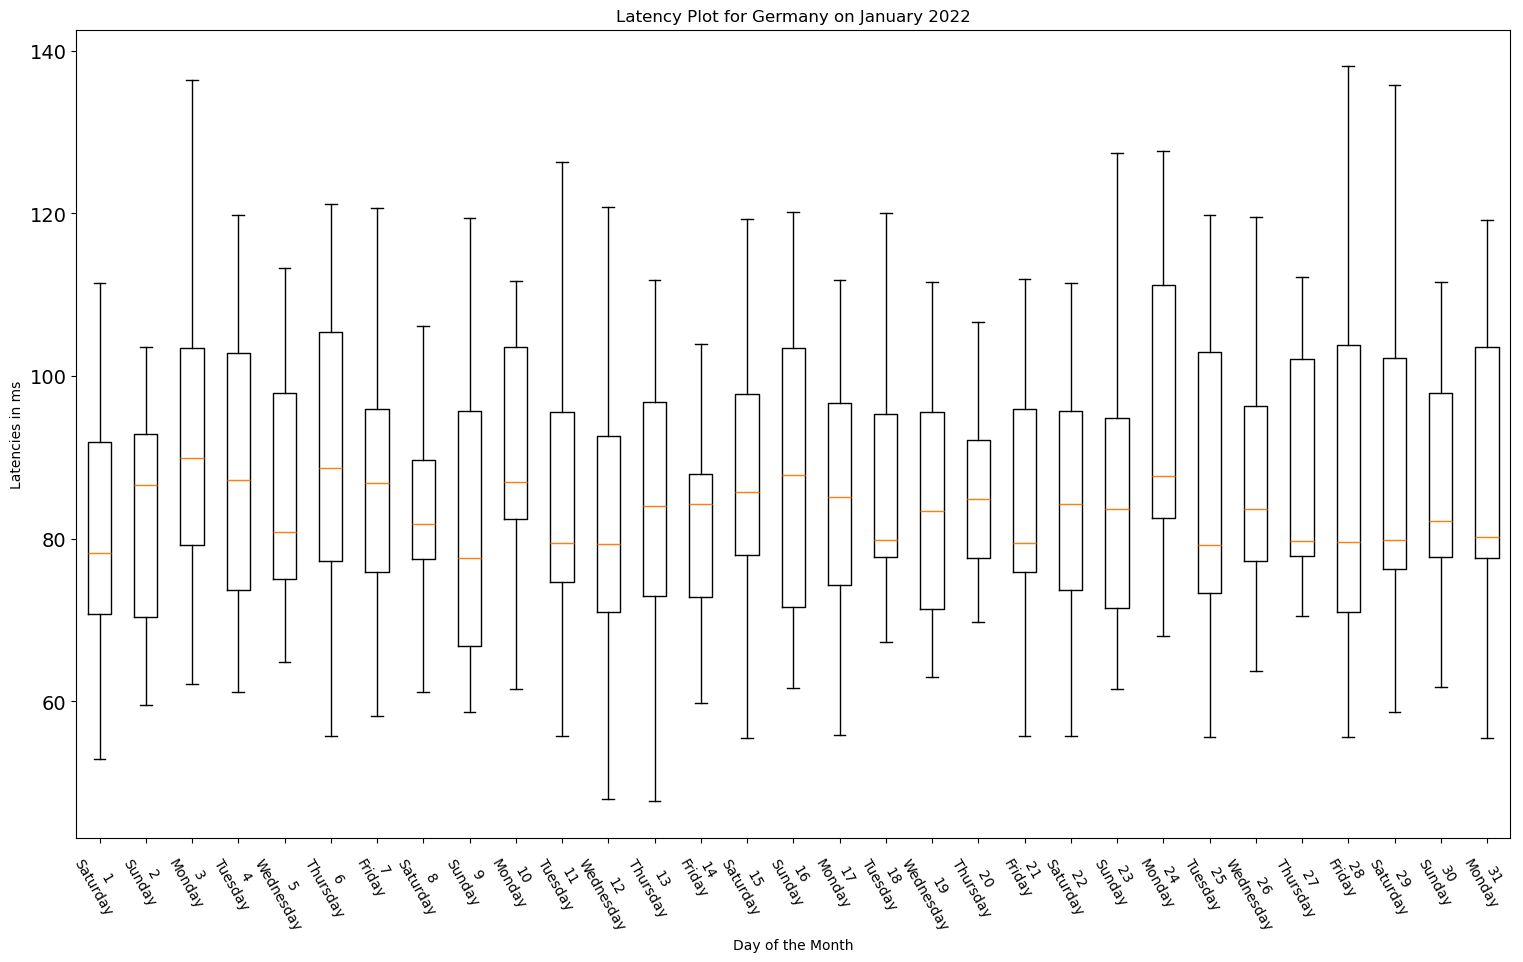

<Figure size 640x480 with 0 Axes>

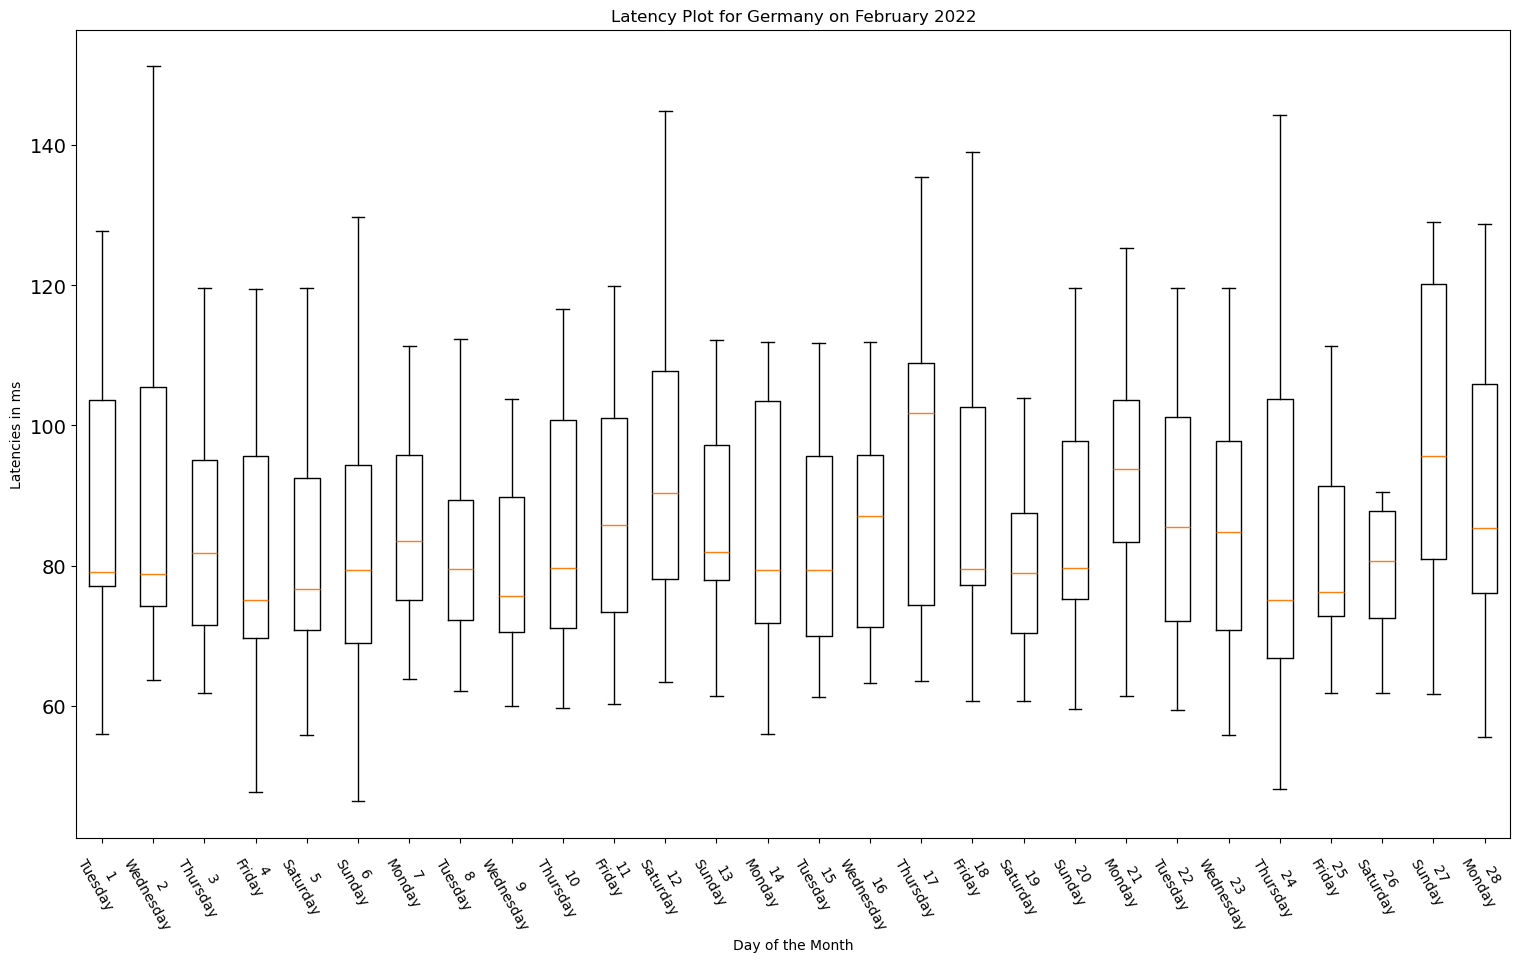

<Figure size 640x480 with 0 Axes>

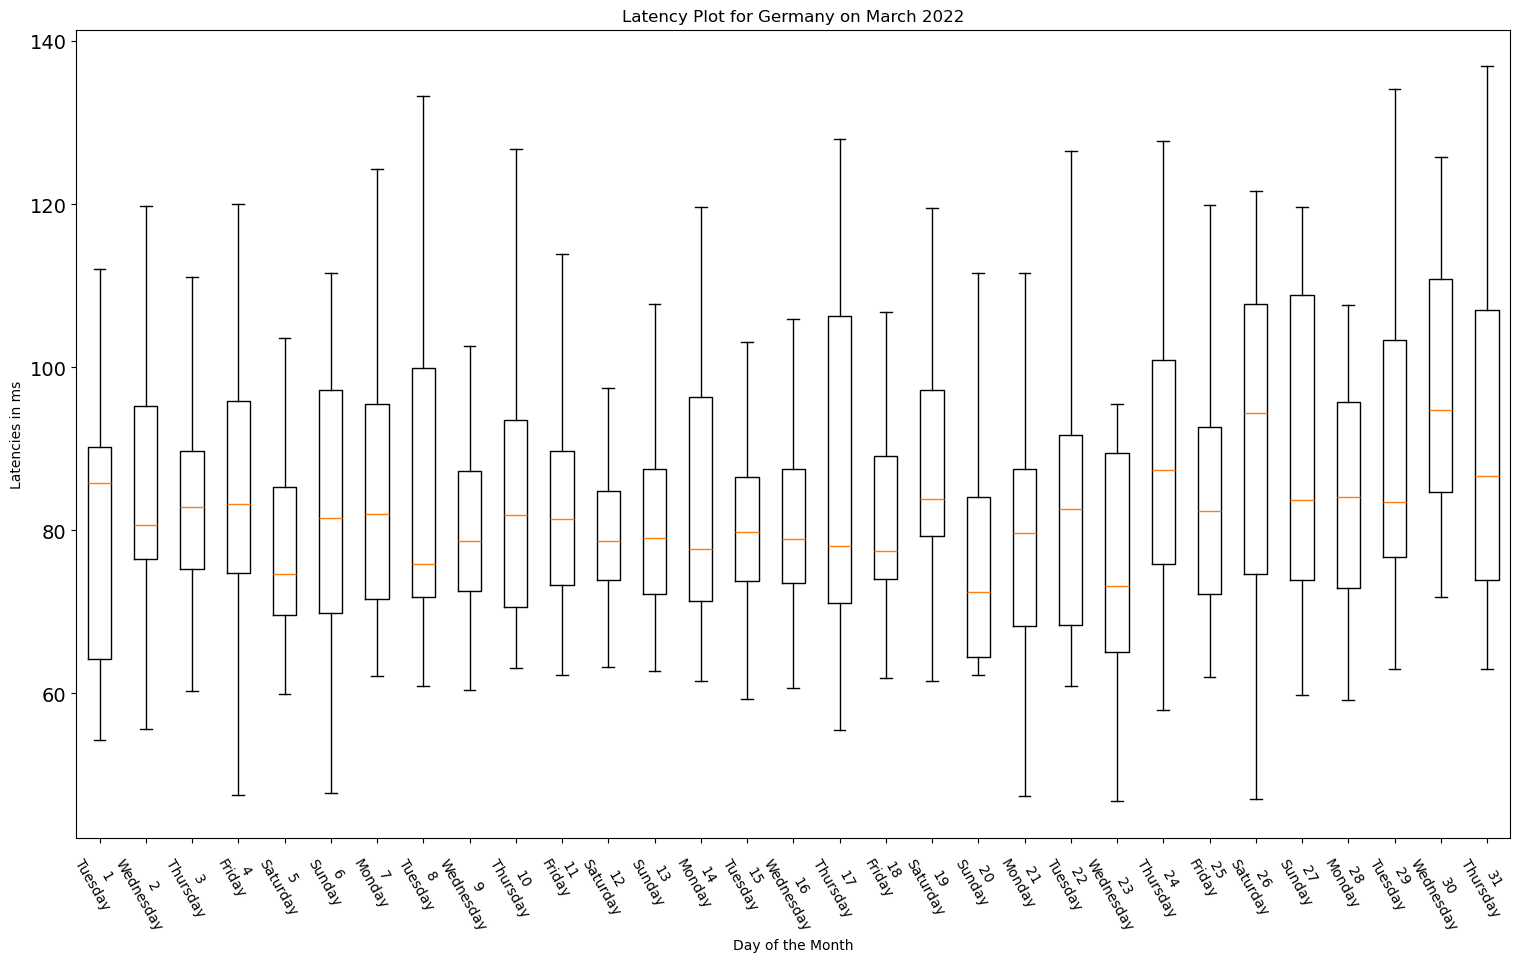

<Figure size 640x480 with 0 Axes>

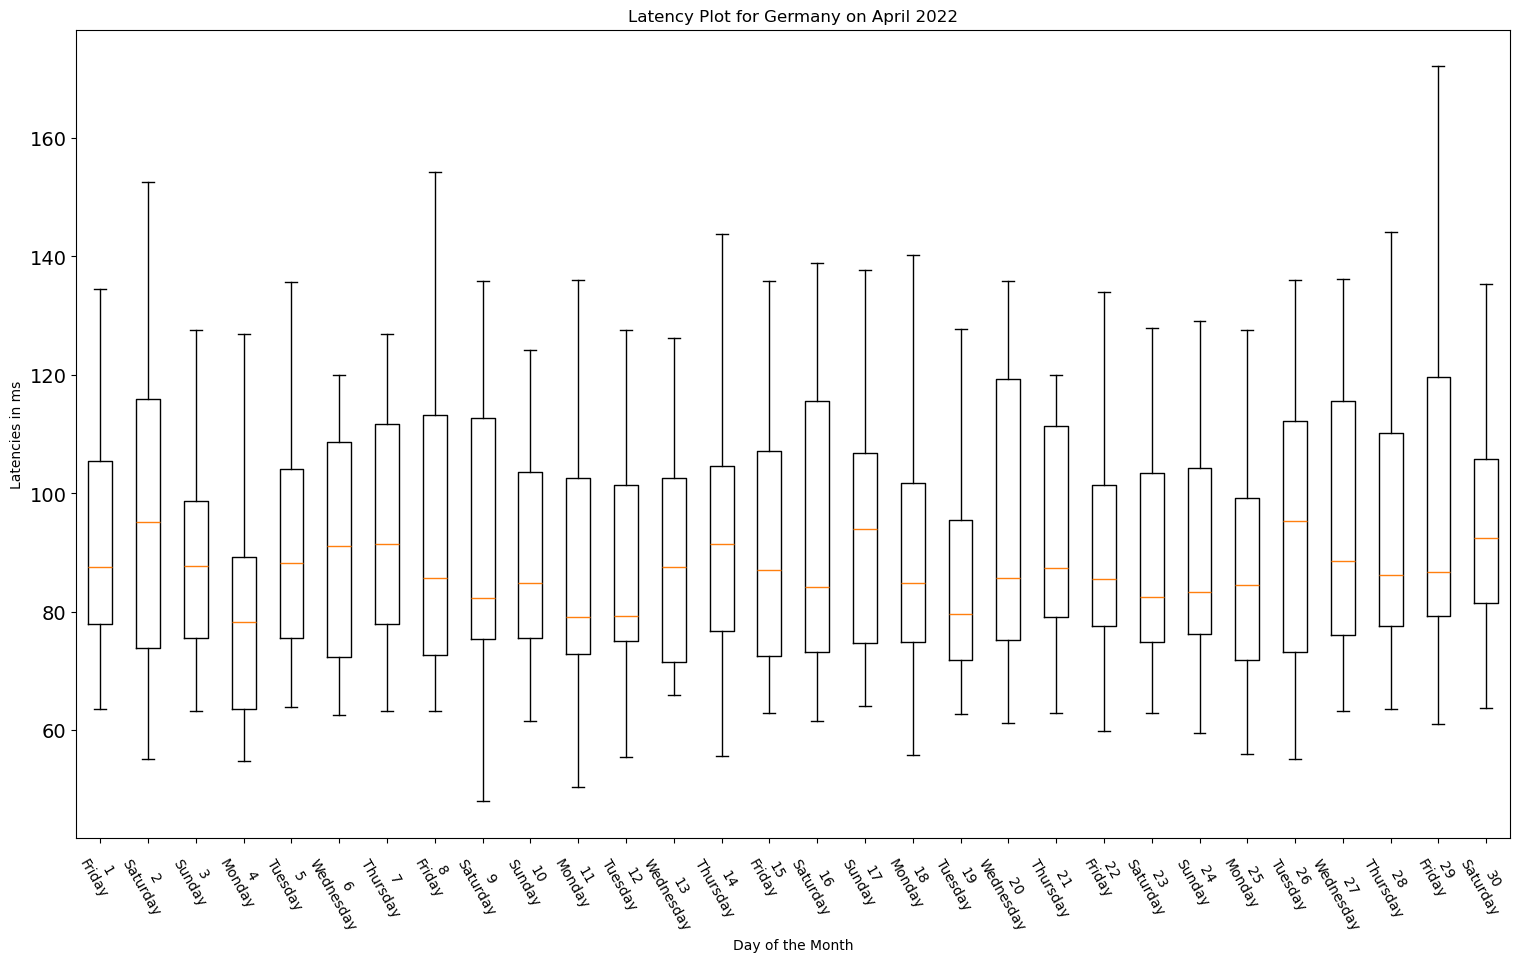

<Figure size 640x480 with 0 Axes>

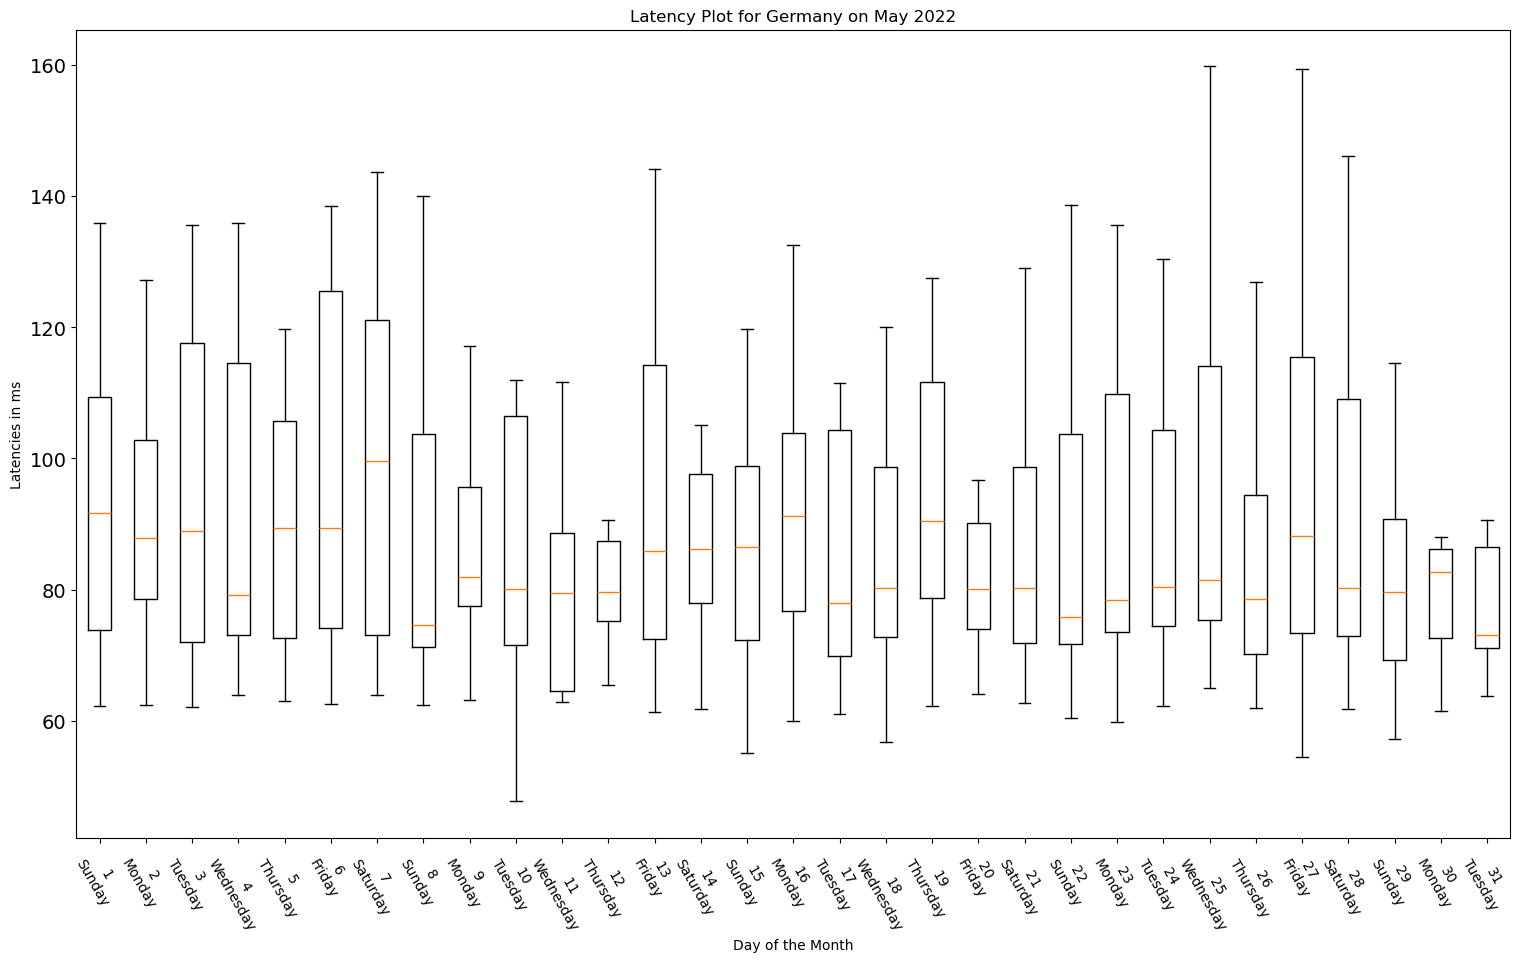

<Figure size 640x480 with 0 Axes>

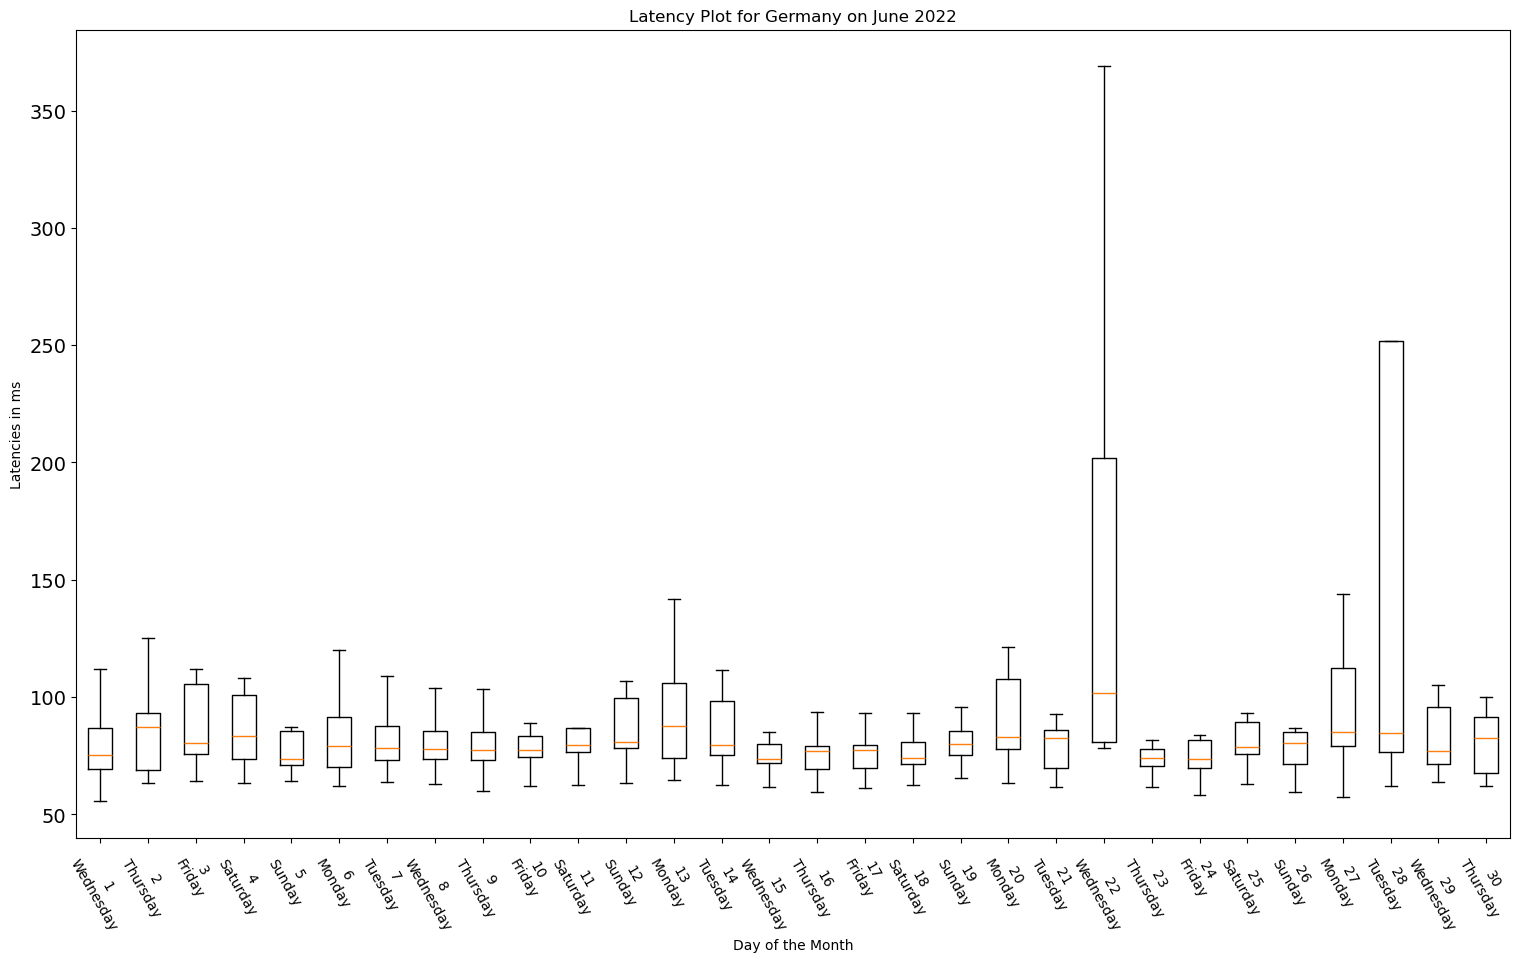

<Figure size 640x480 with 0 Axes>

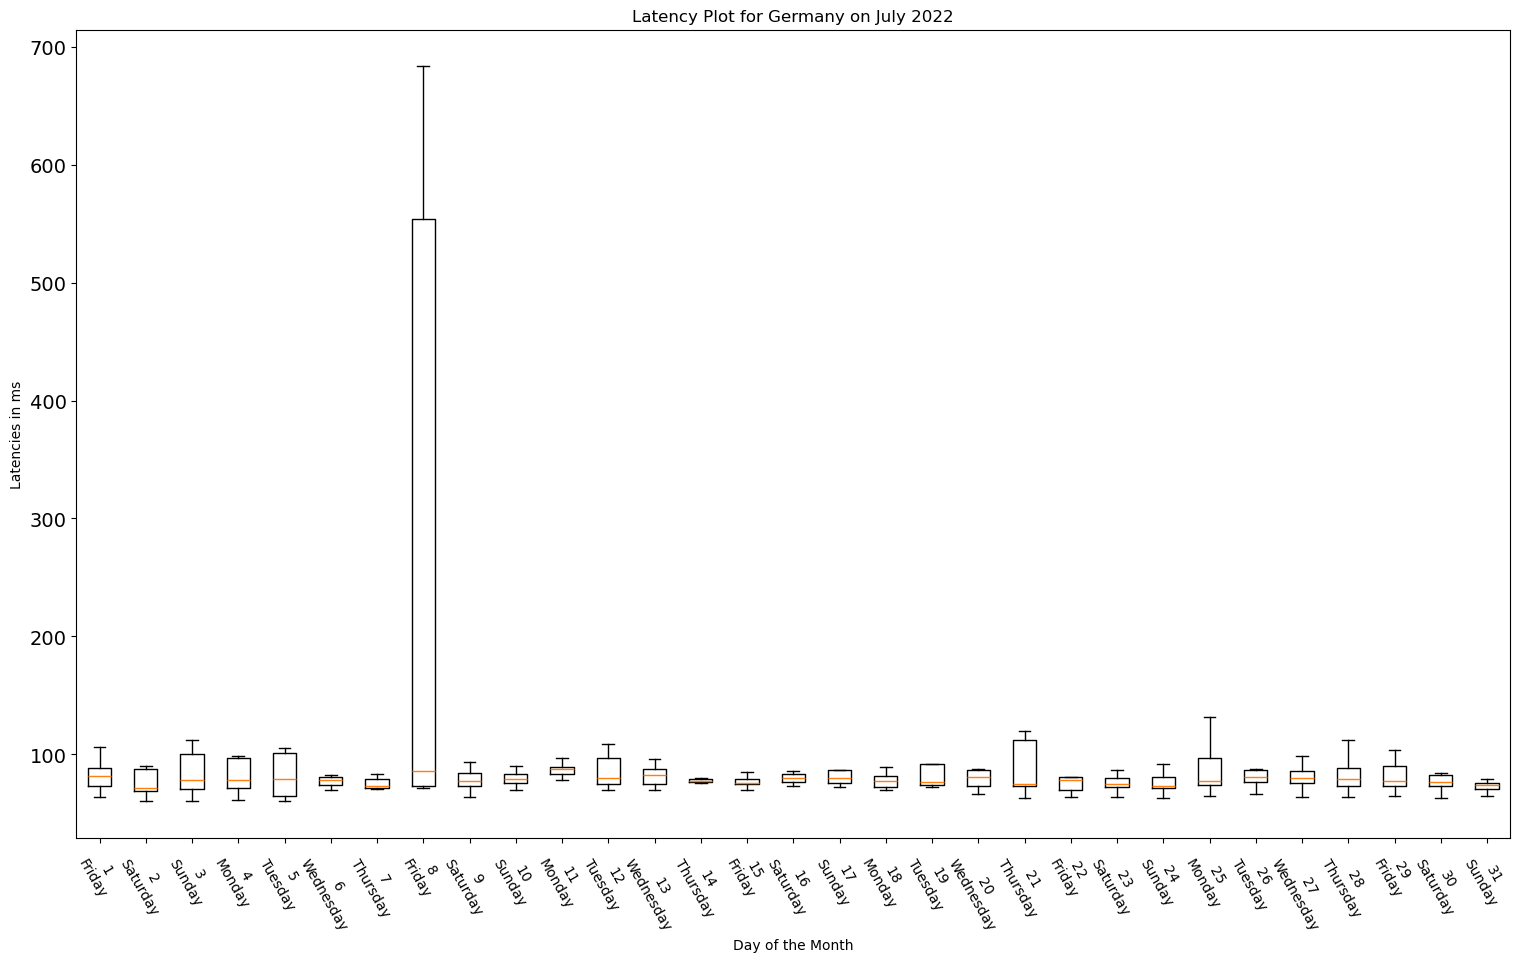

<Figure size 640x480 with 0 Axes>

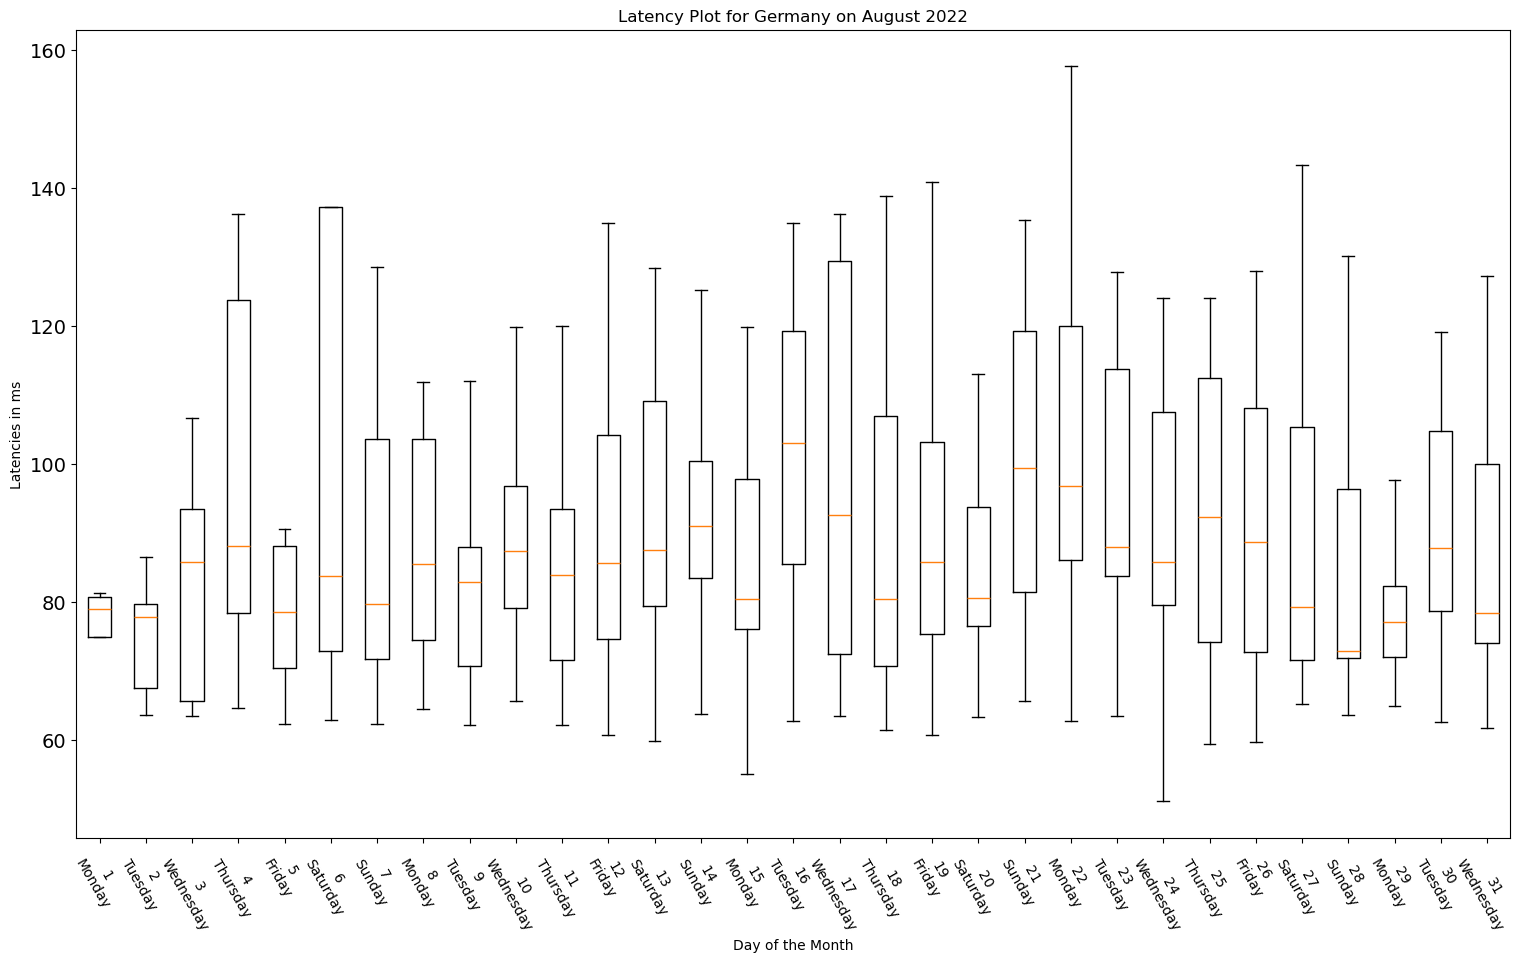

<Figure size 640x480 with 0 Axes>

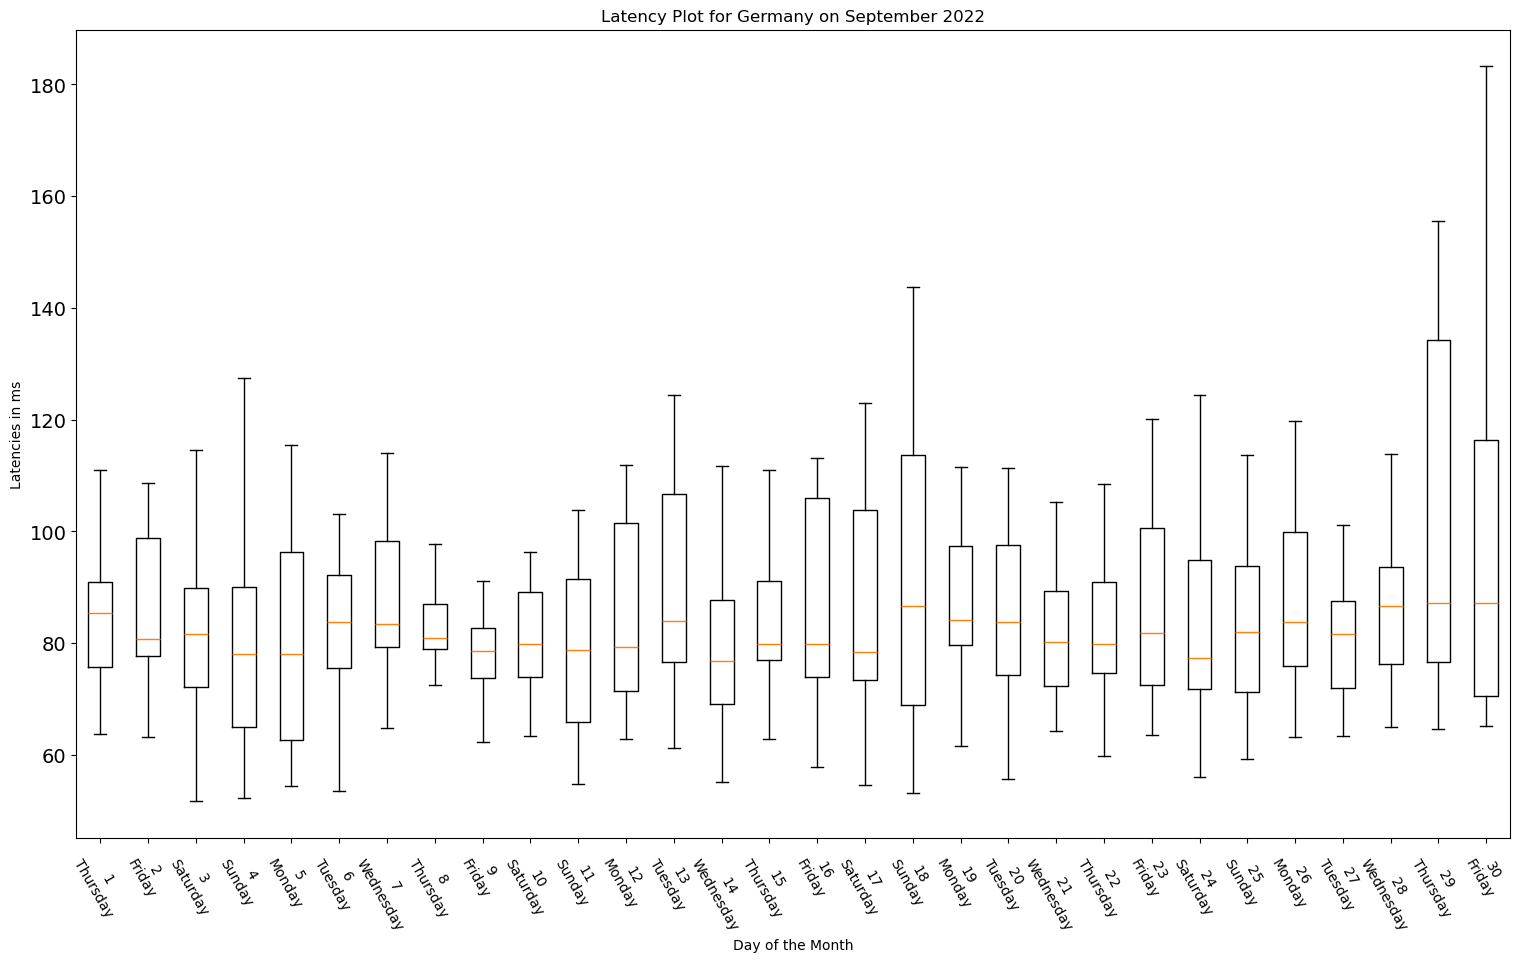

<Figure size 640x480 with 0 Axes>

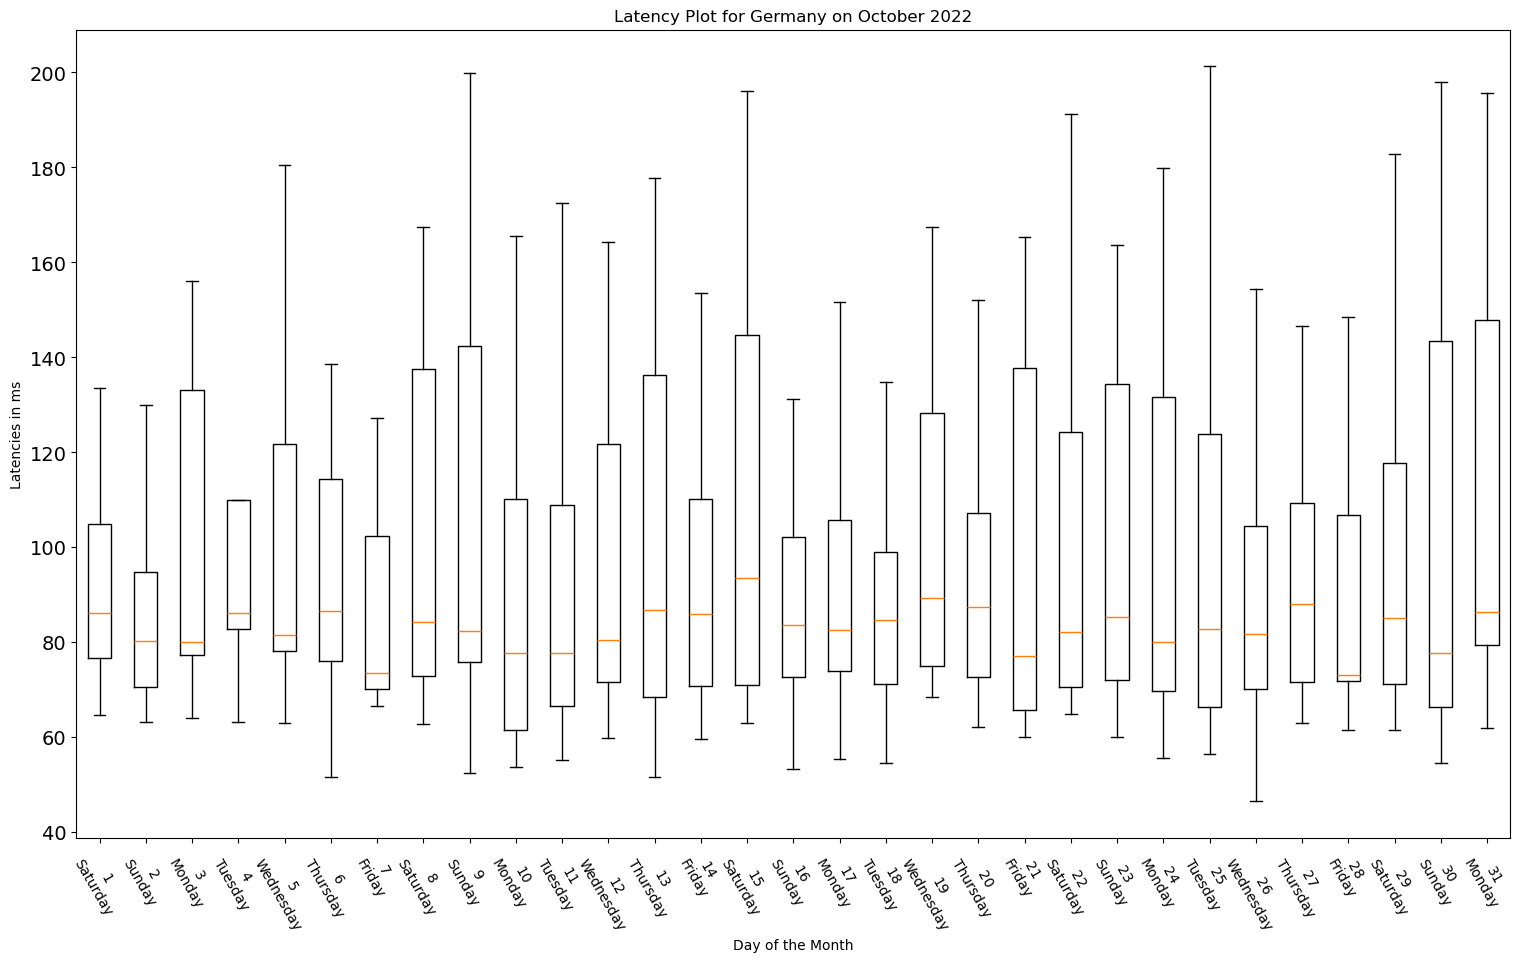

<Figure size 640x480 with 0 Axes>

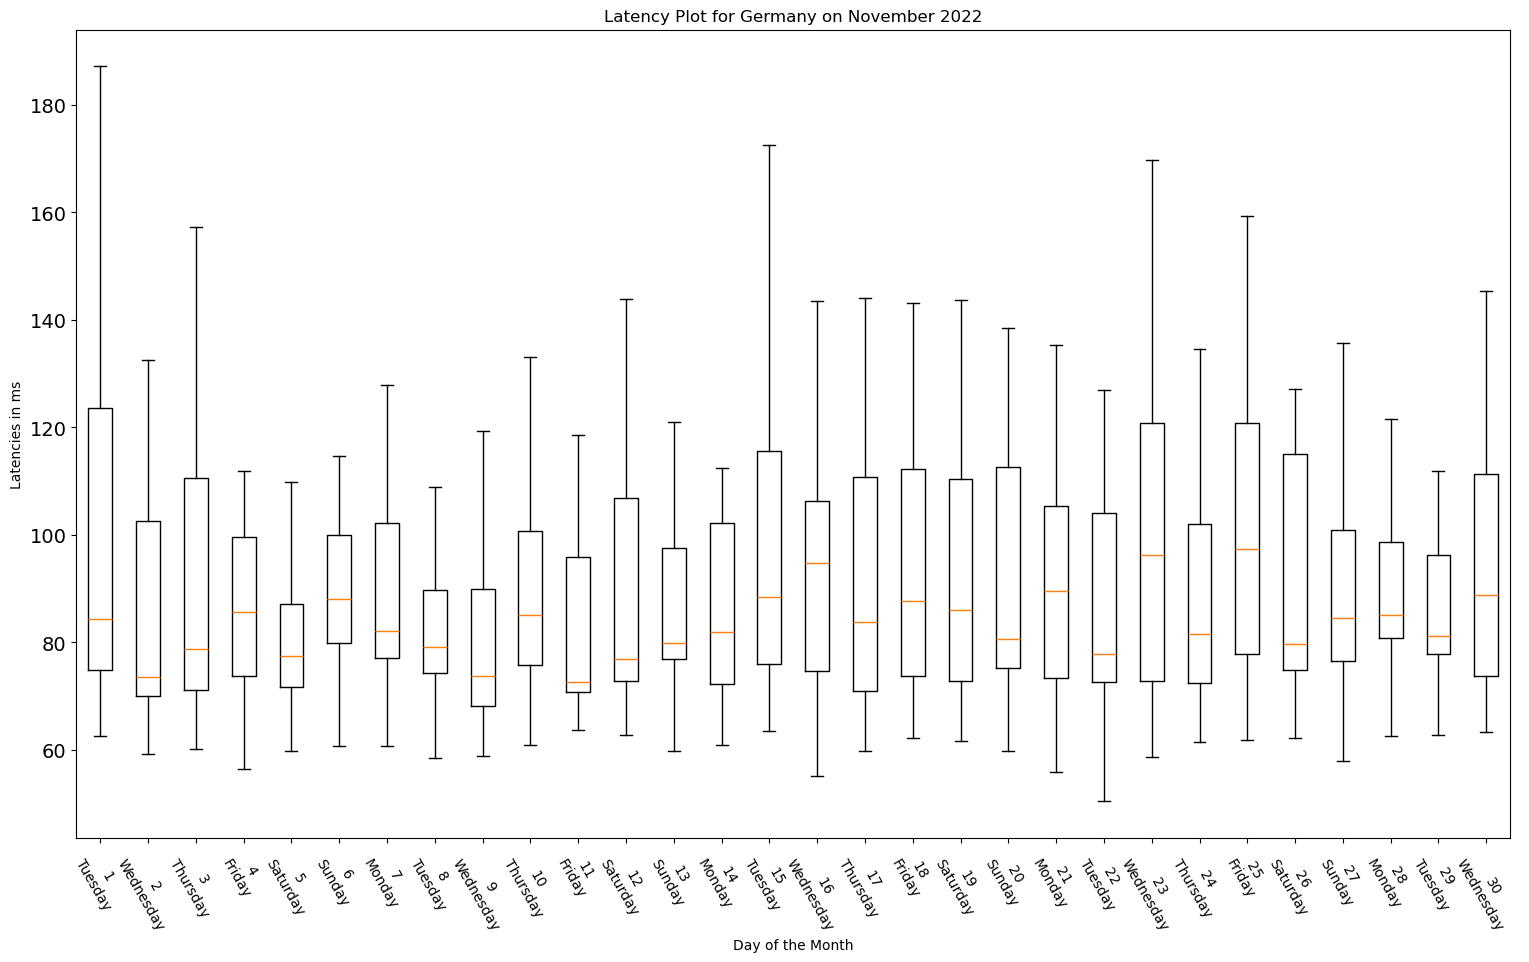

<Figure size 640x480 with 0 Axes>

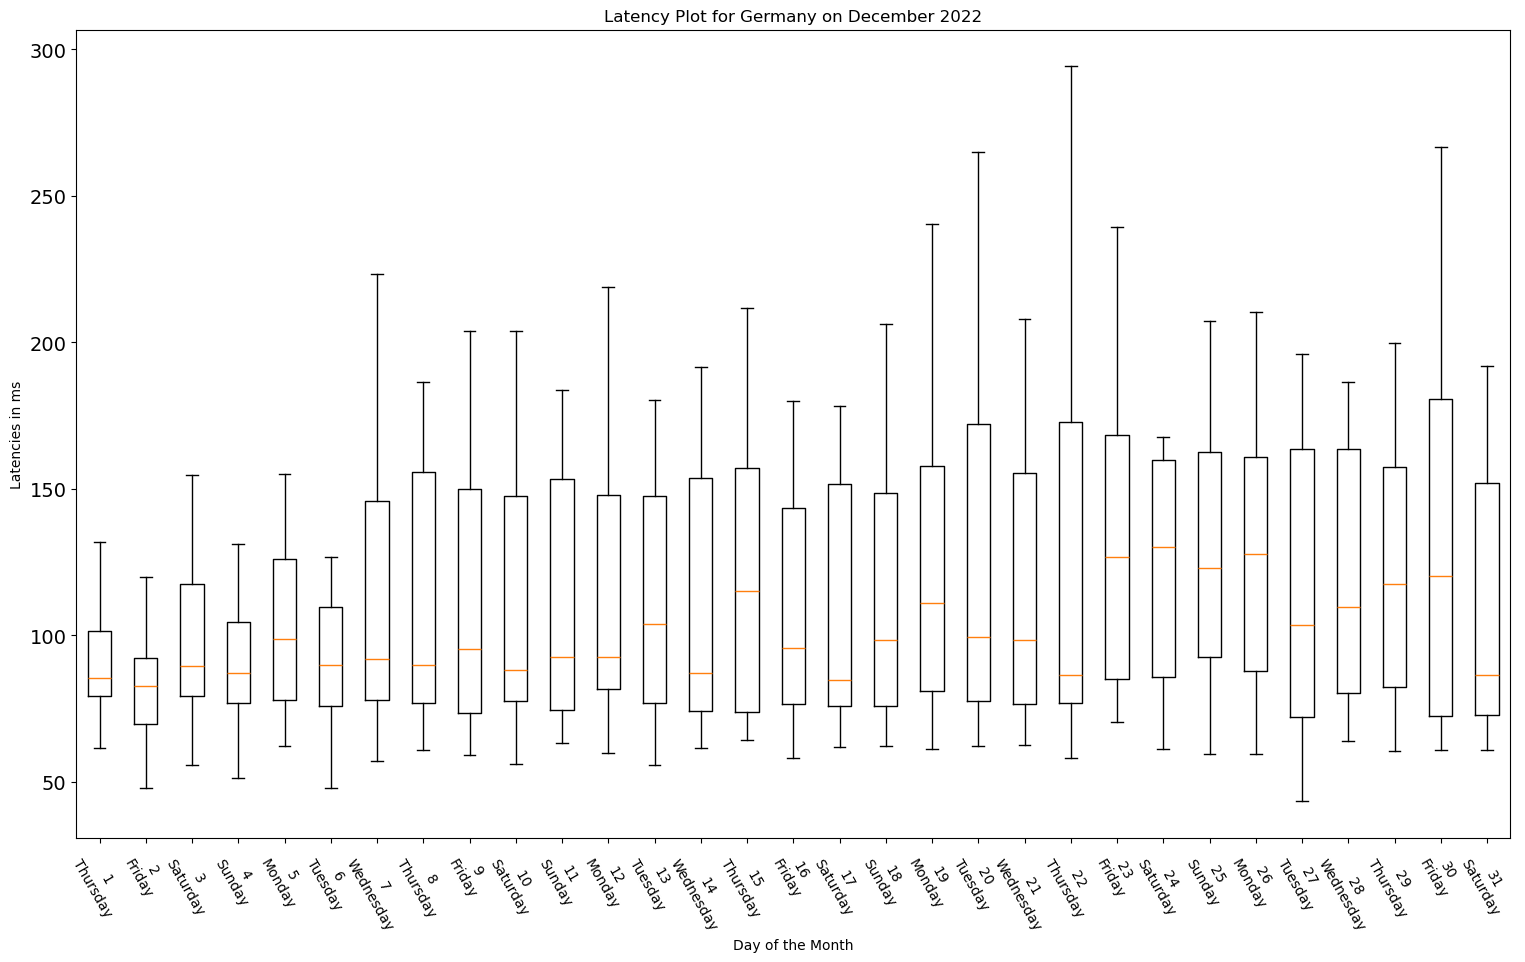

<Figure size 640x480 with 0 Axes>

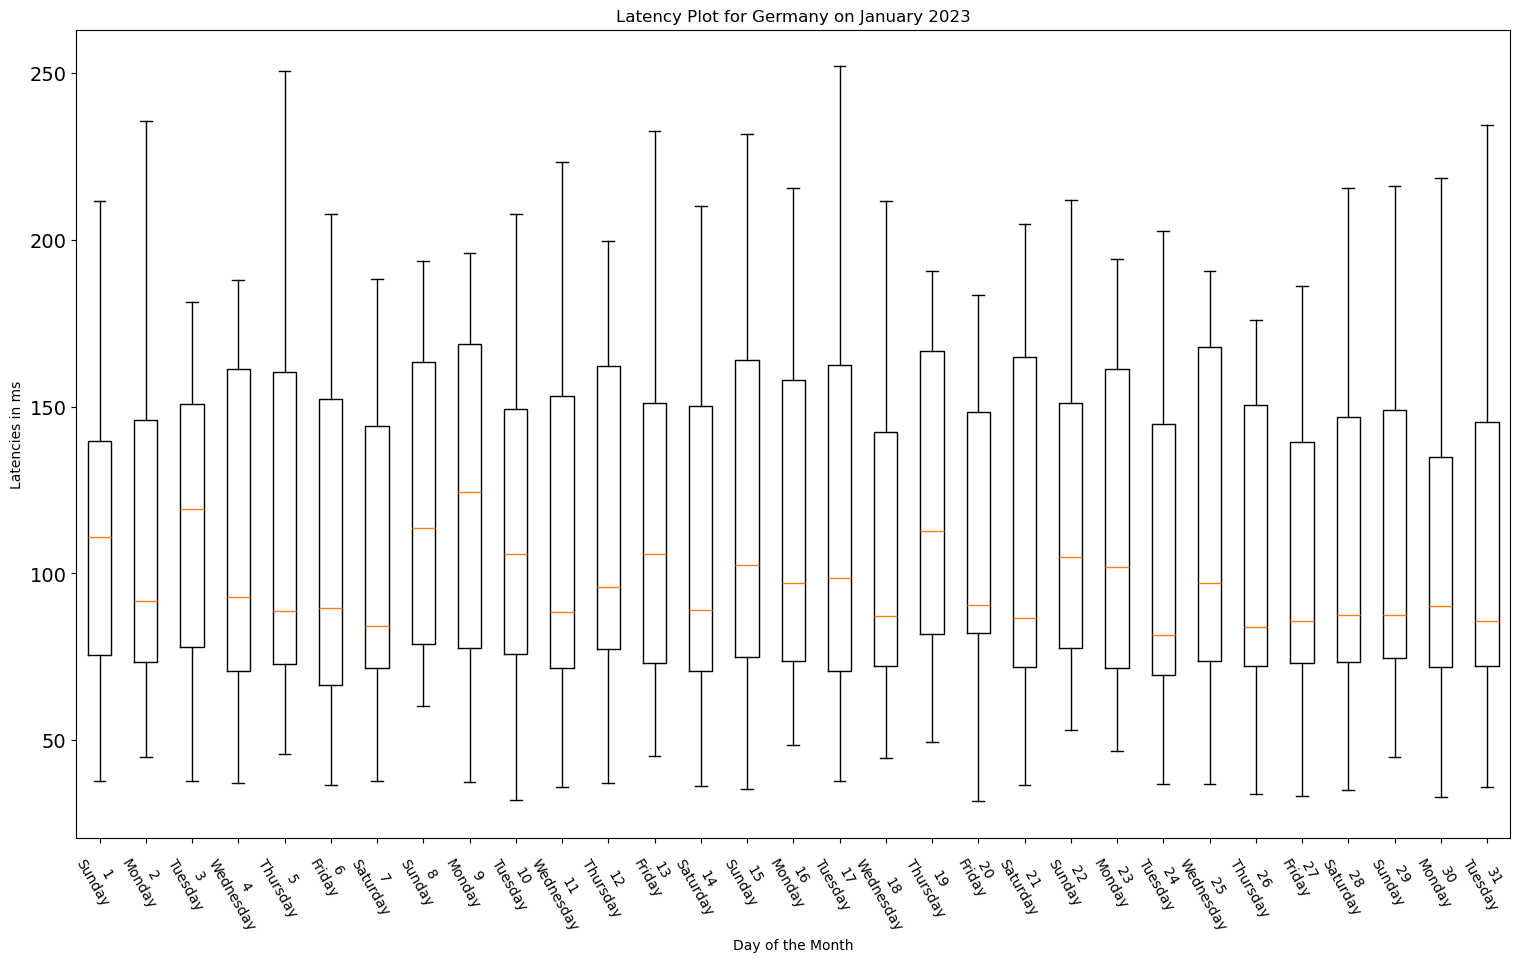

<Figure size 640x480 with 0 Axes>

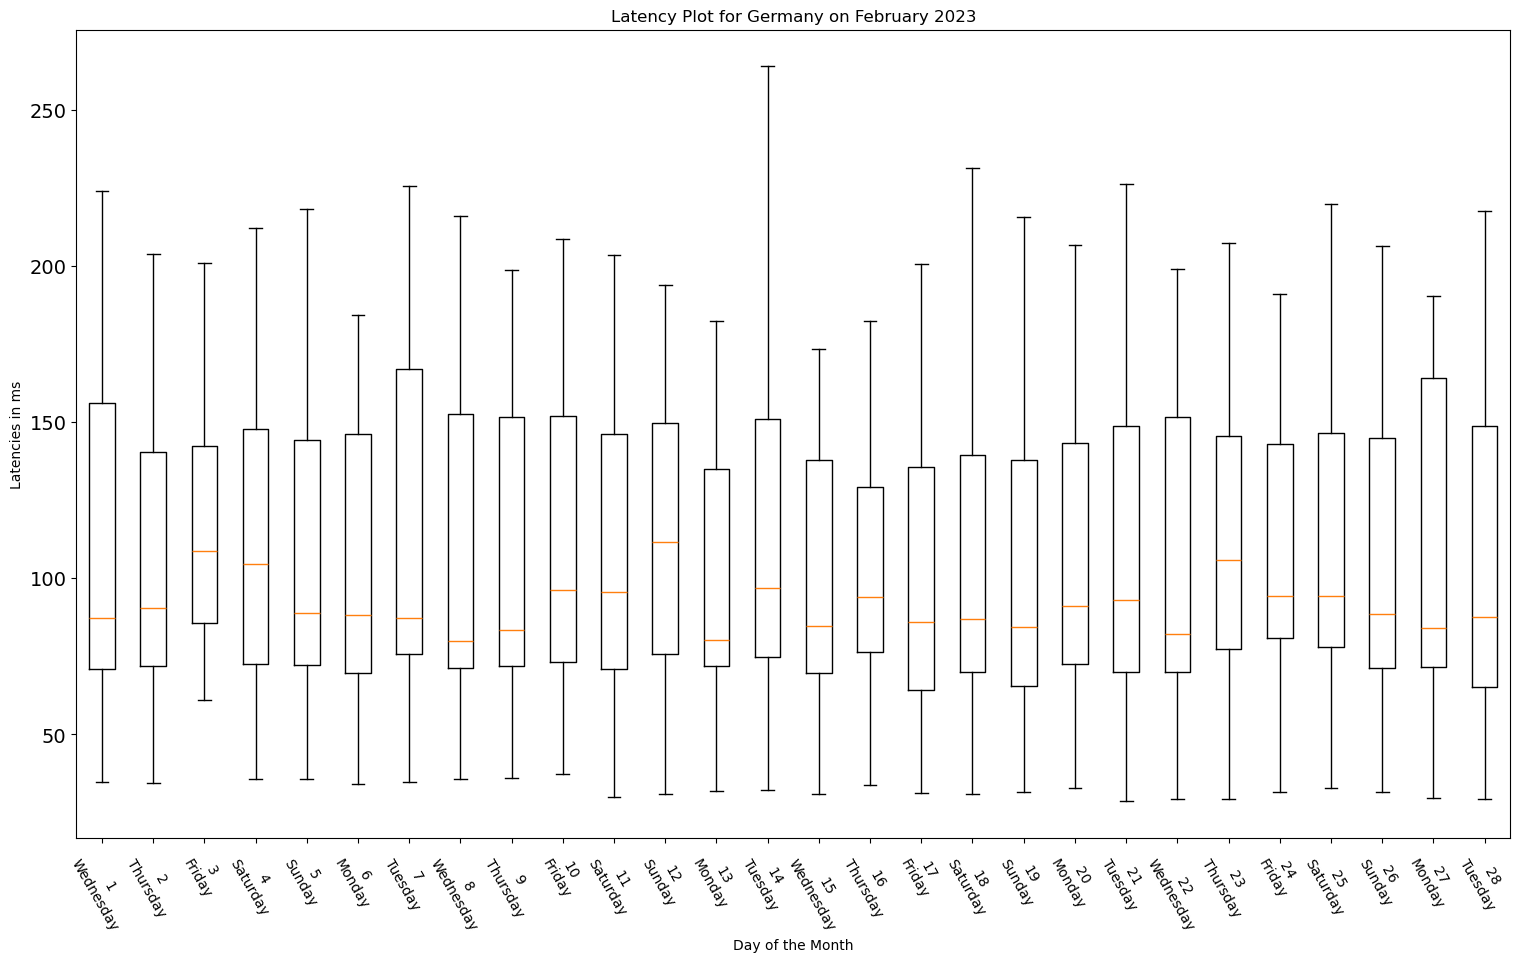

<Figure size 640x480 with 0 Axes>

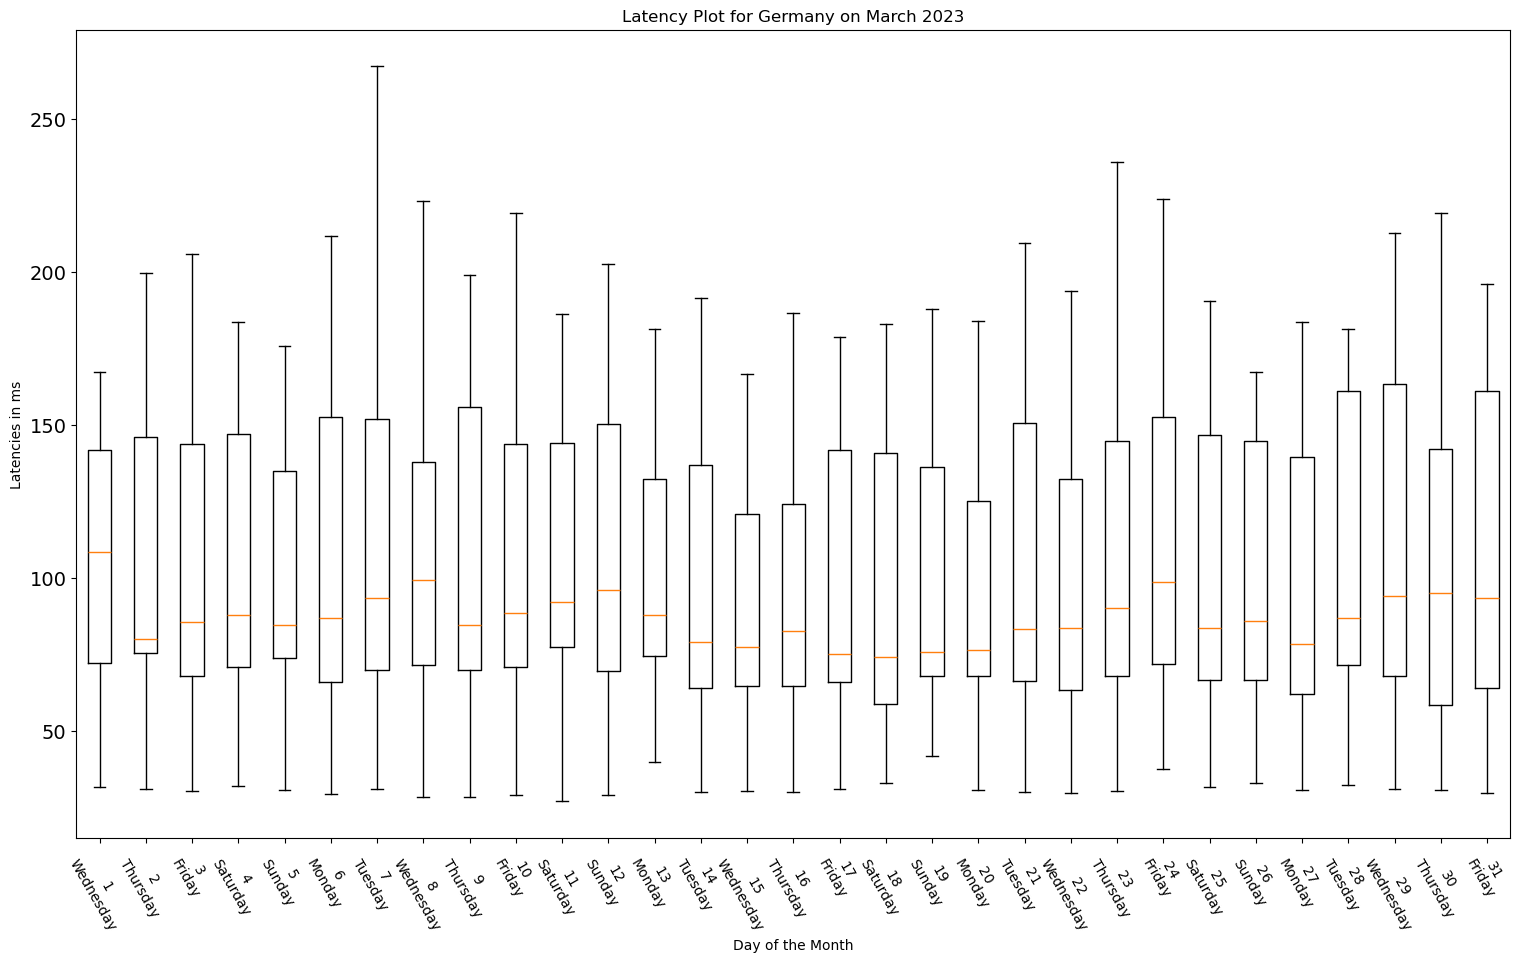

<Figure size 640x480 with 0 Axes>

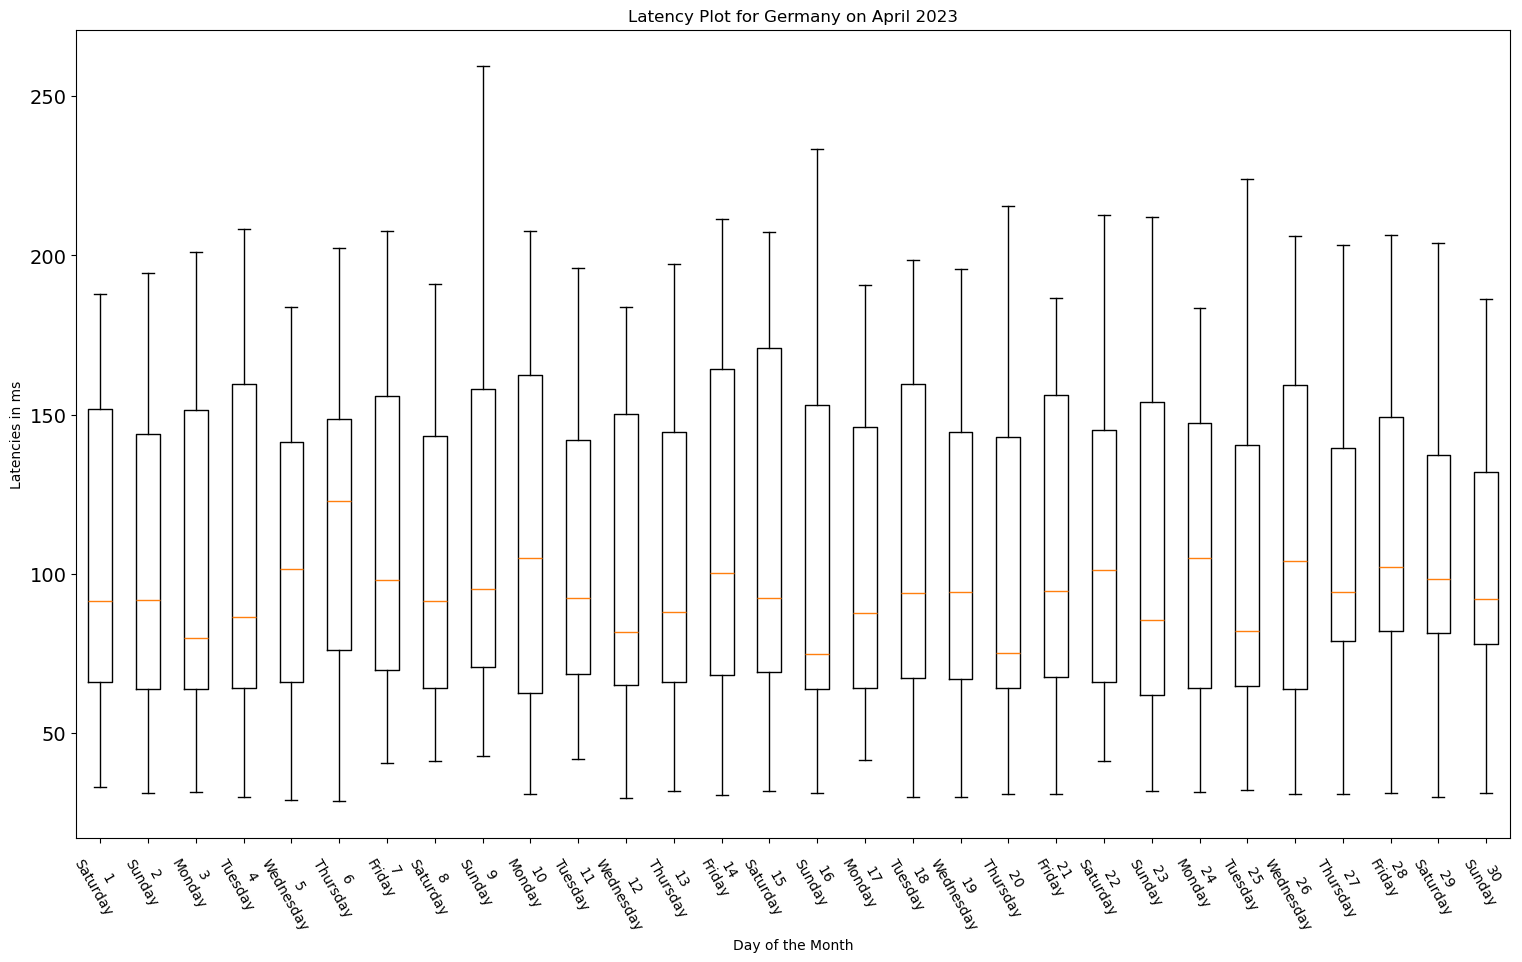

<Figure size 640x480 with 0 Axes>

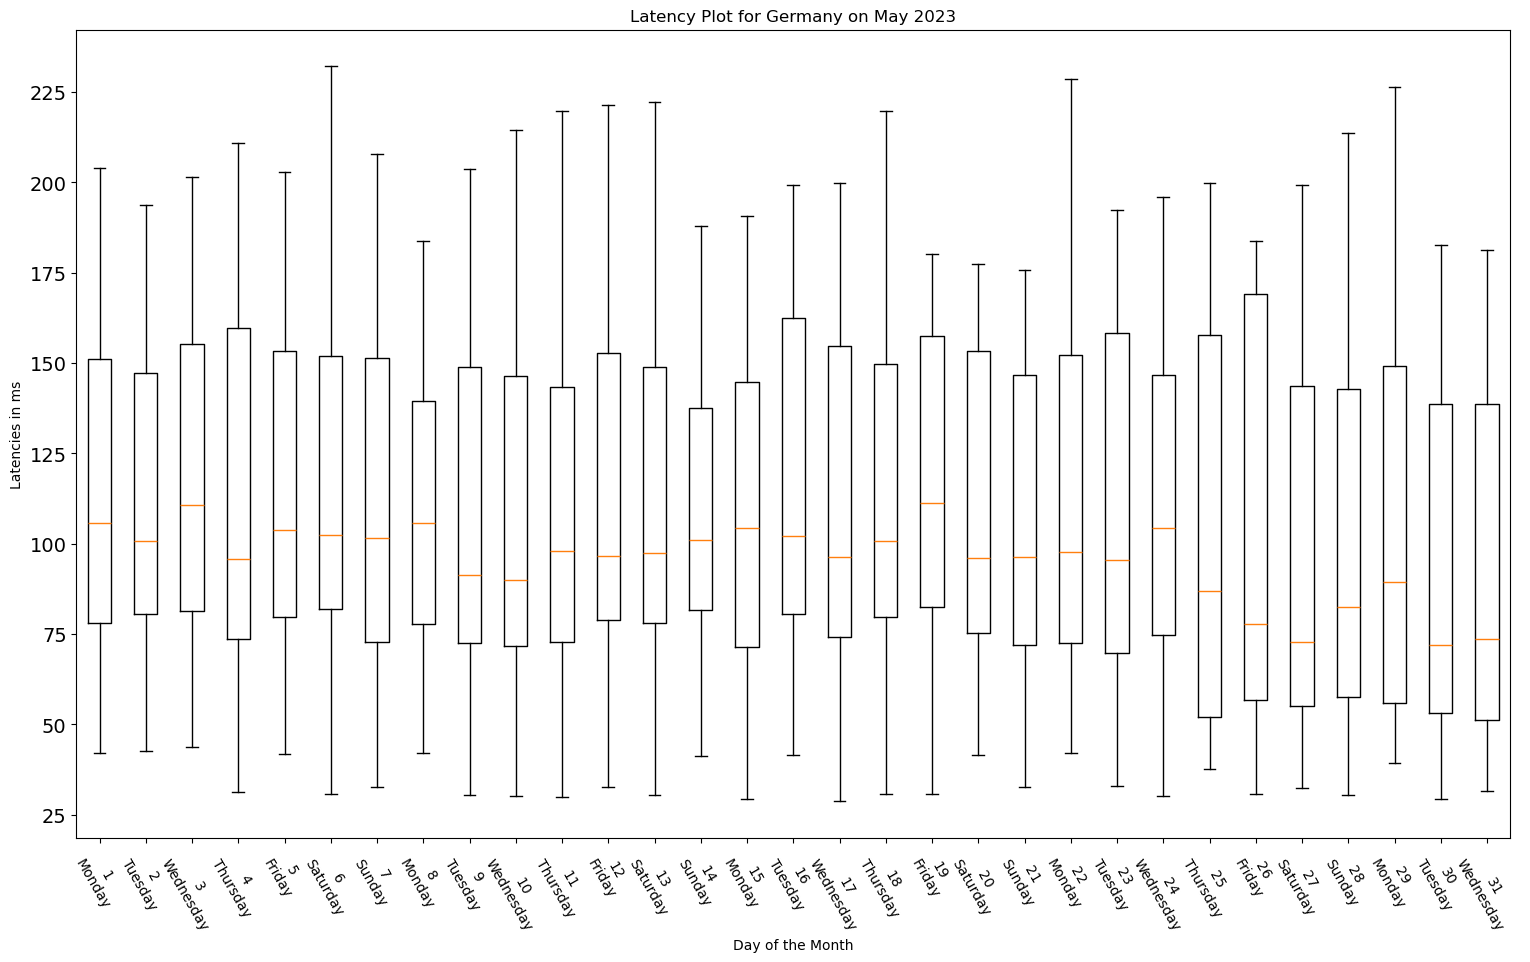

<Figure size 640x480 with 0 Axes>

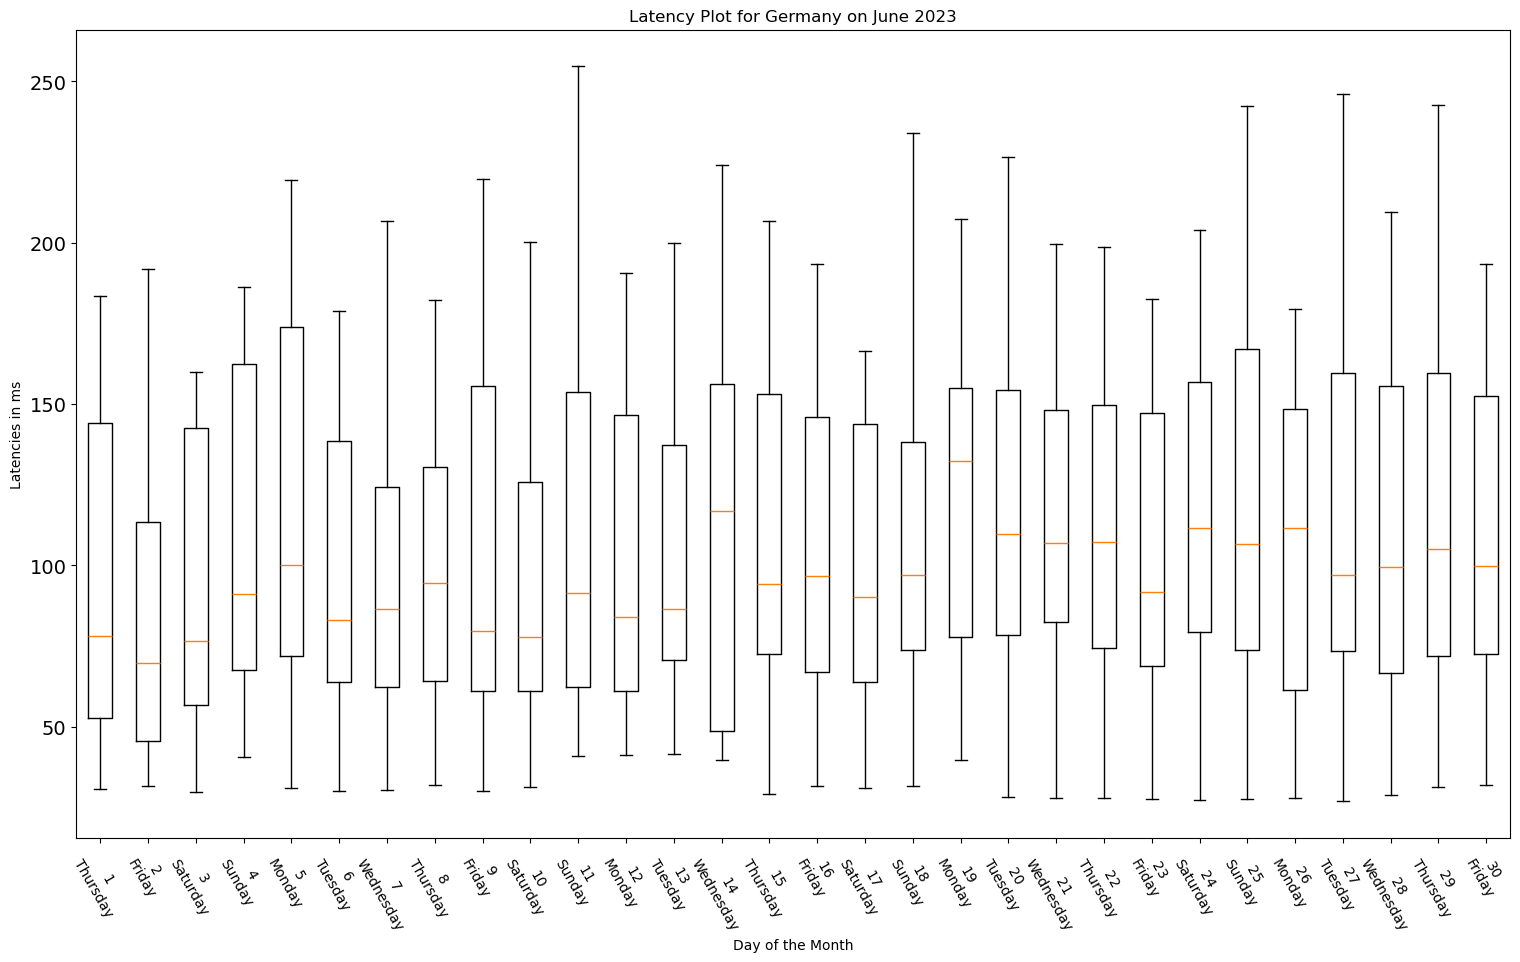

<Figure size 640x480 with 0 Axes>

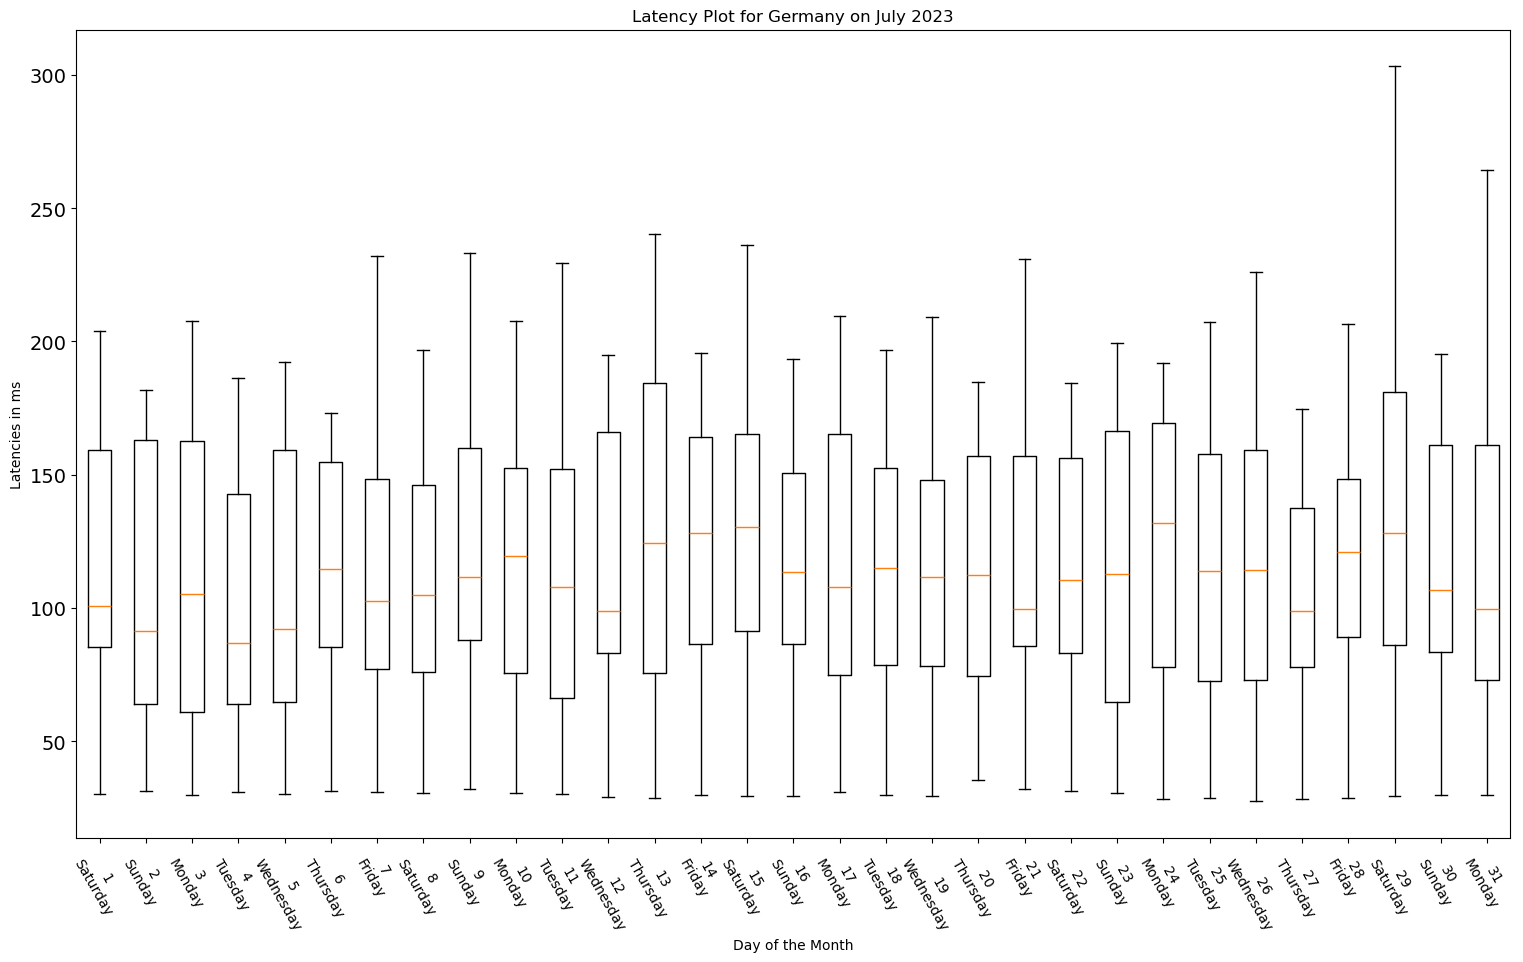

<Figure size 640x480 with 0 Axes>

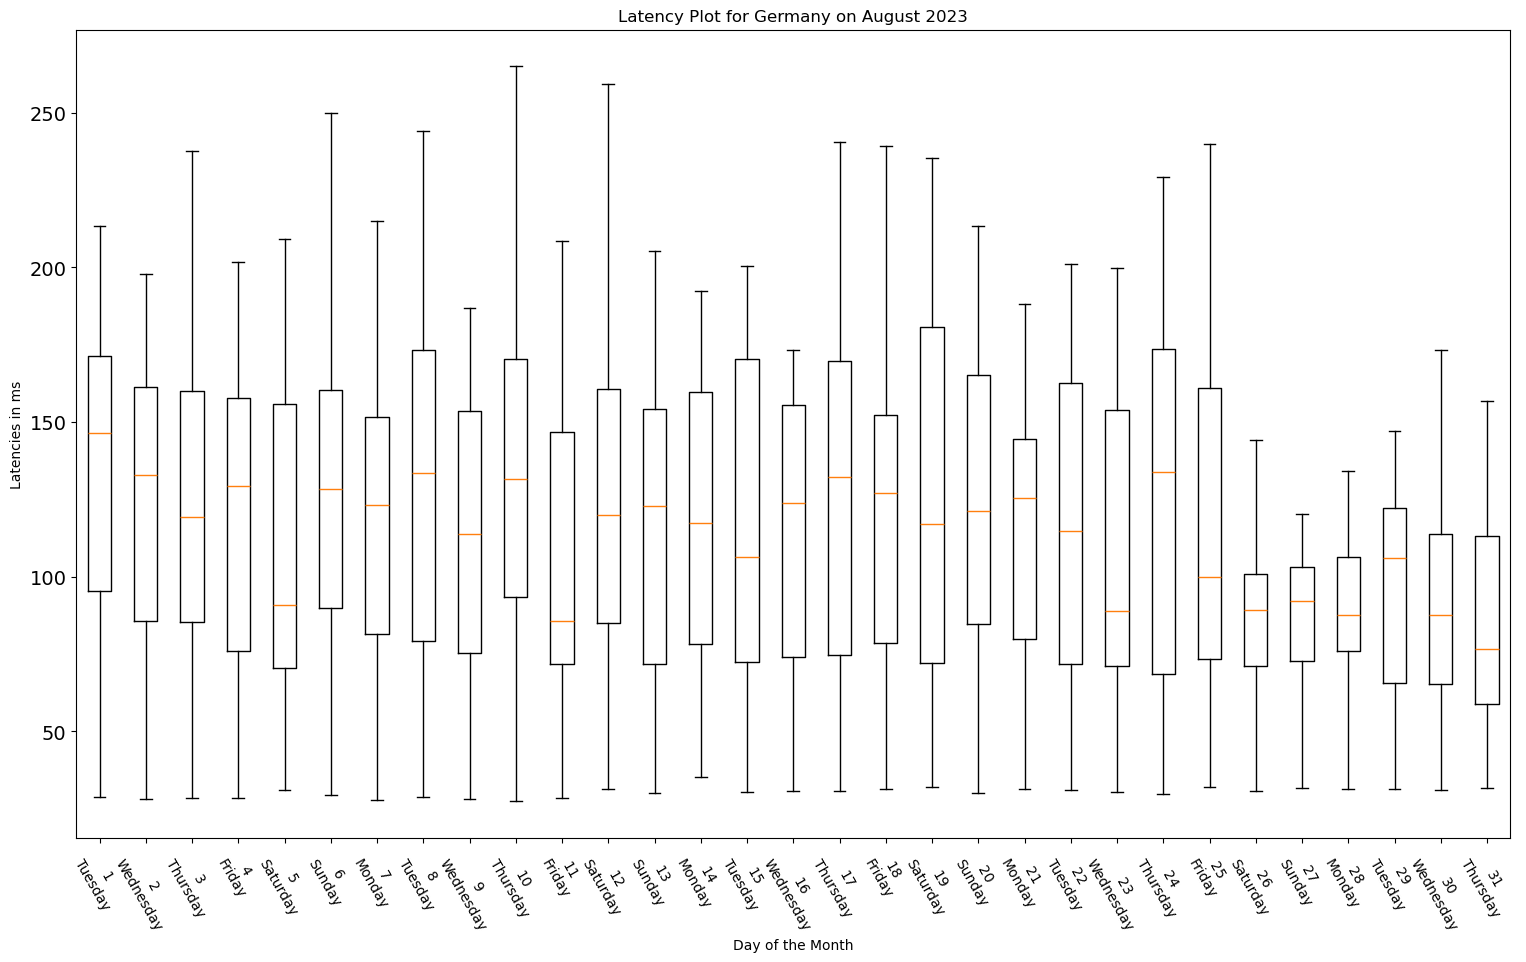

<Figure size 640x480 with 0 Axes>

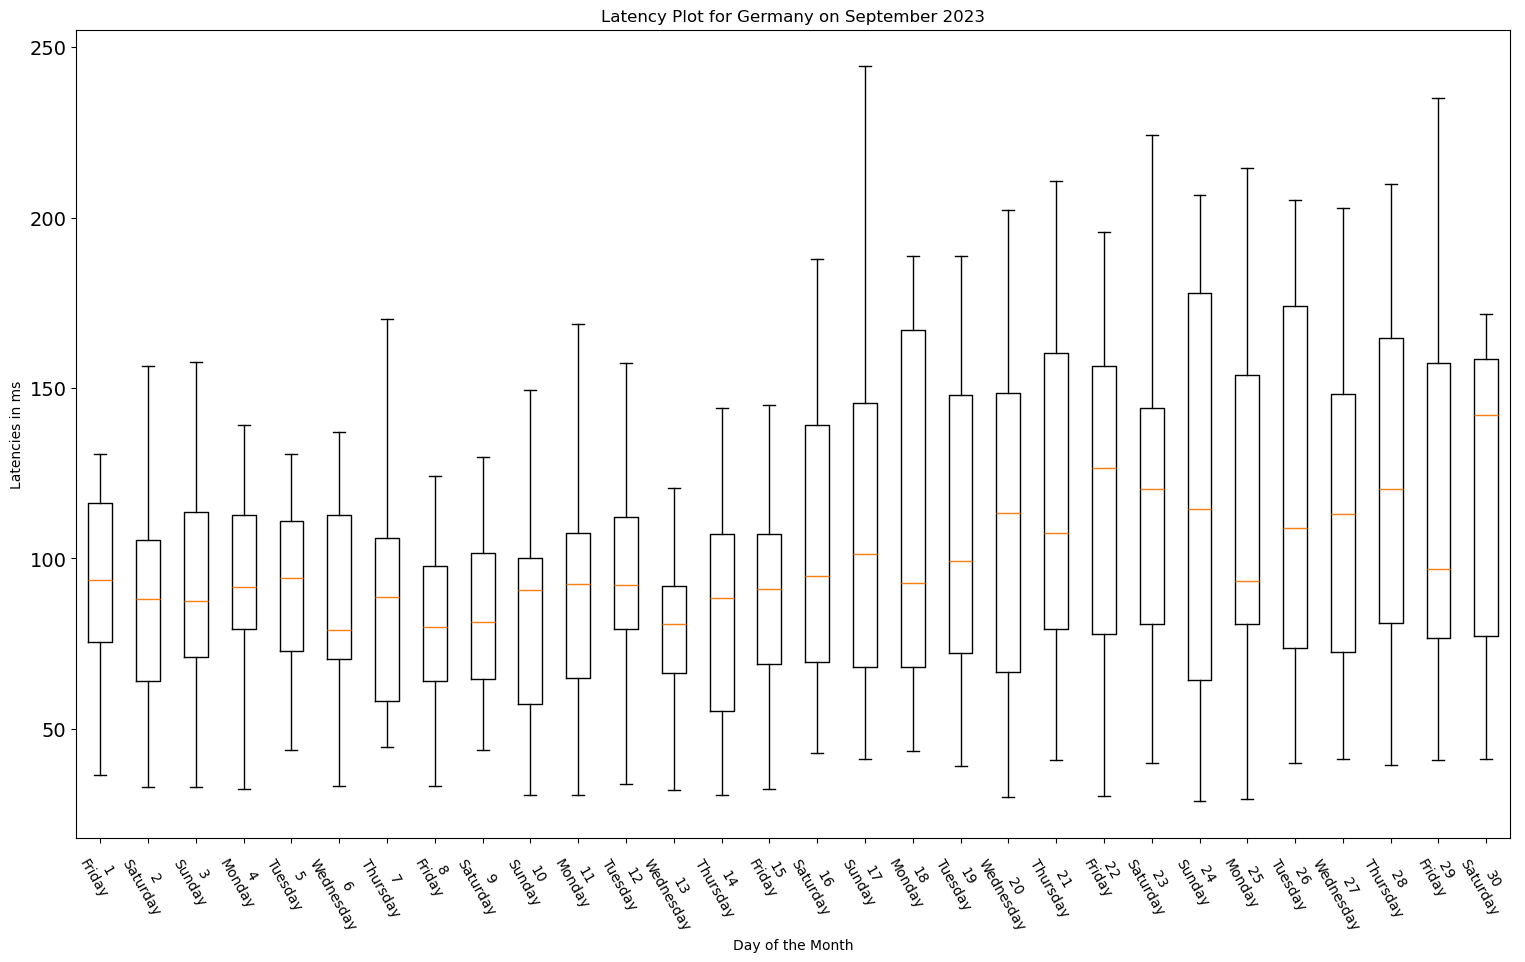

<Figure size 640x480 with 0 Axes>

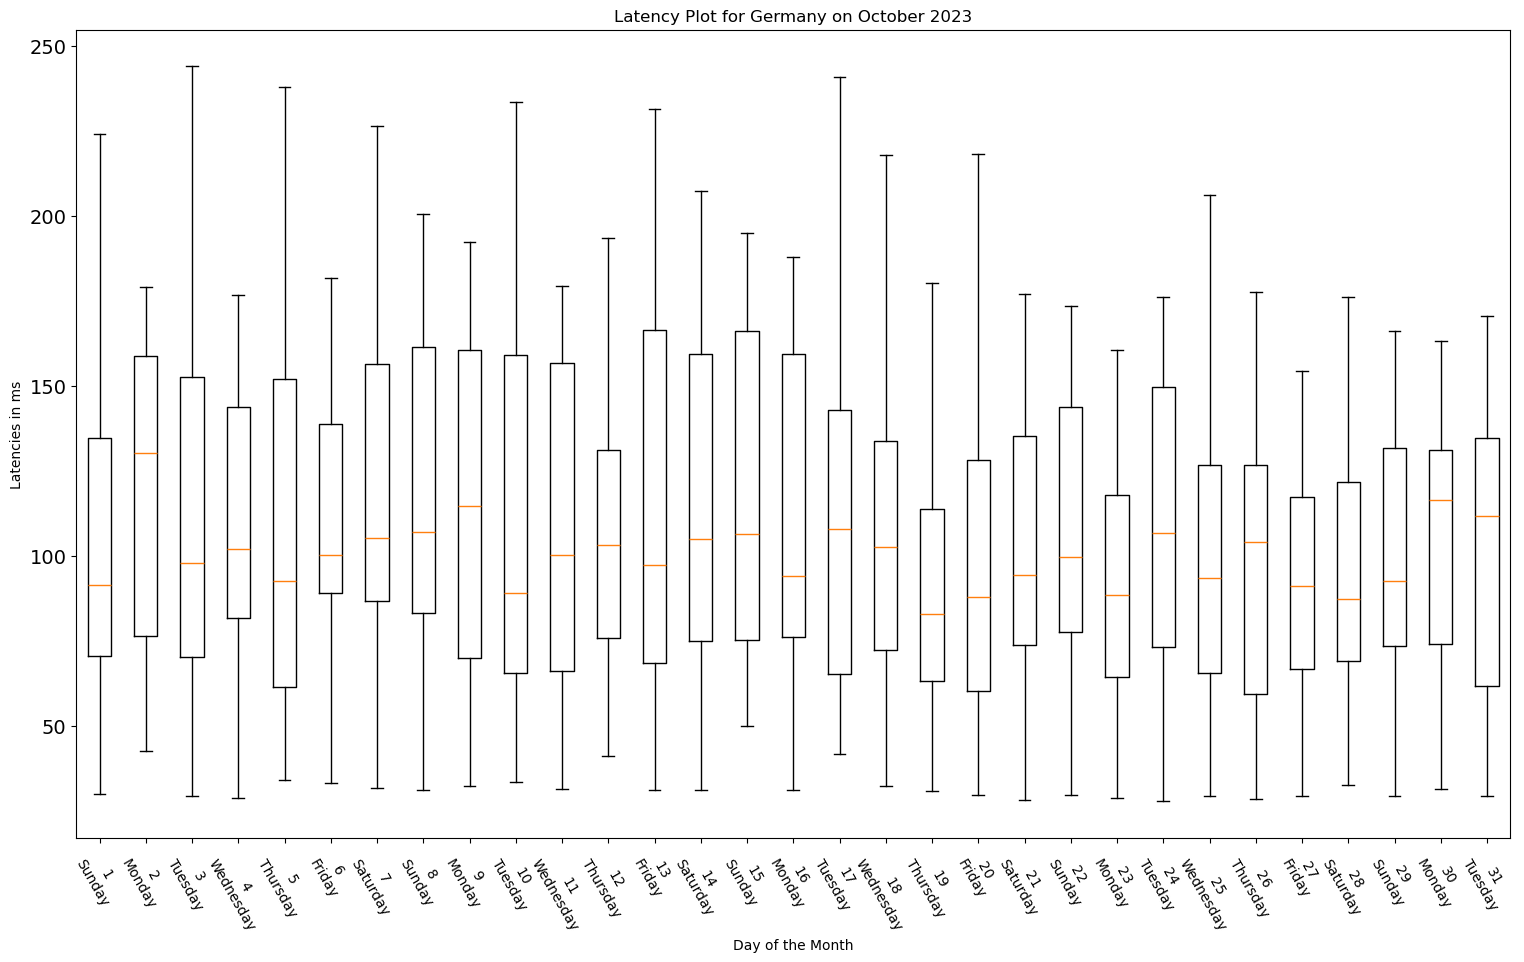

<Figure size 640x480 with 0 Axes>

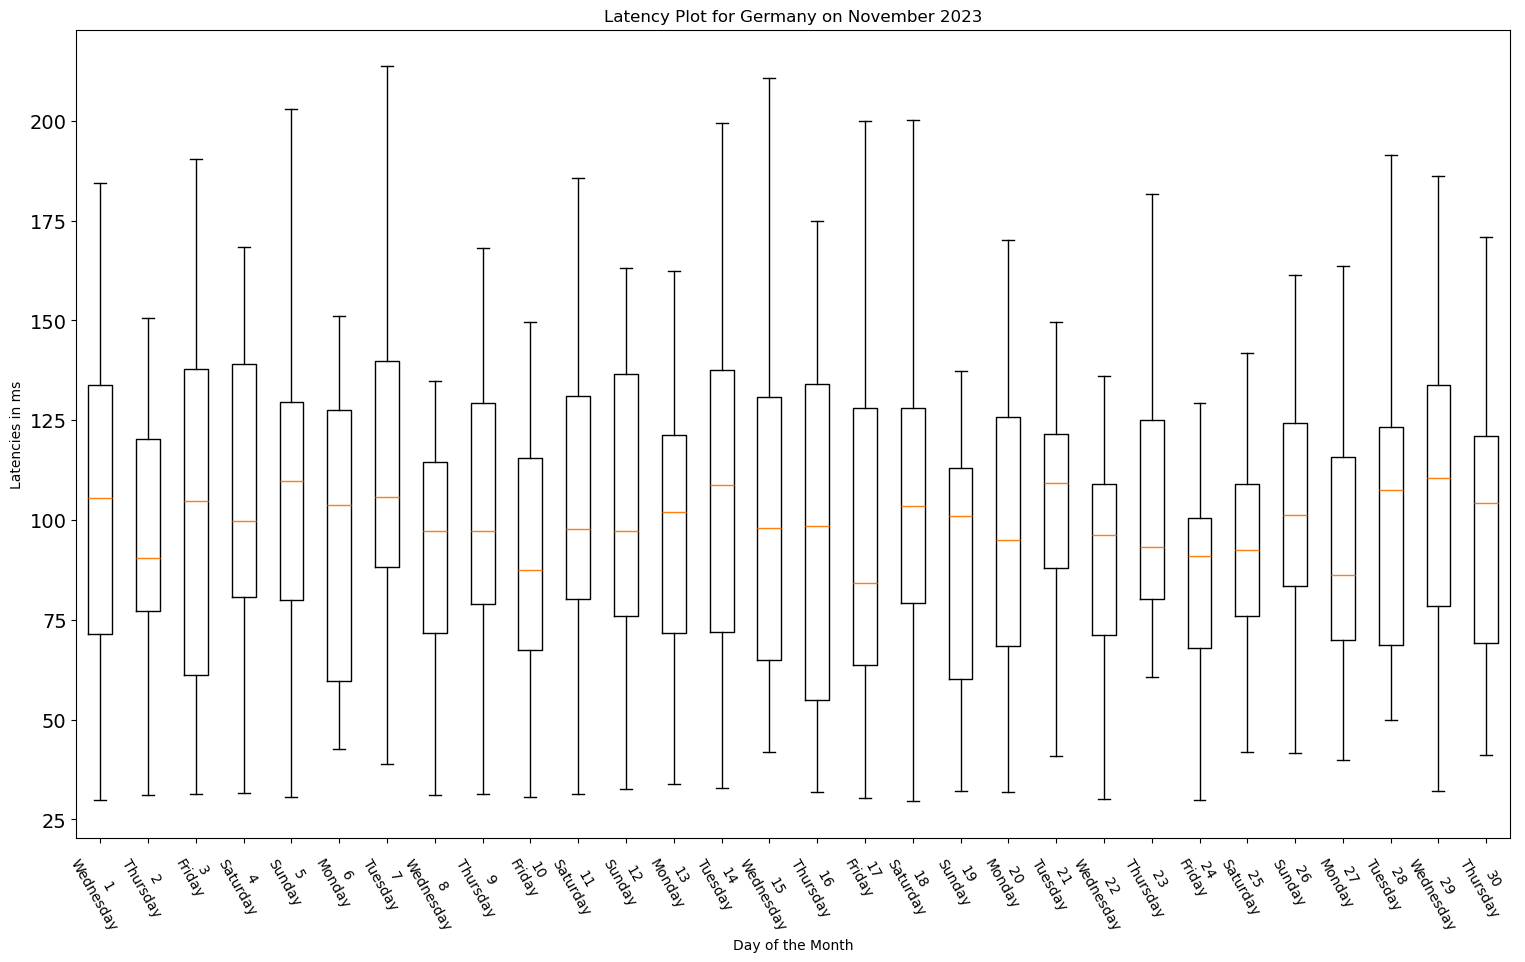

<Figure size 640x480 with 0 Axes>

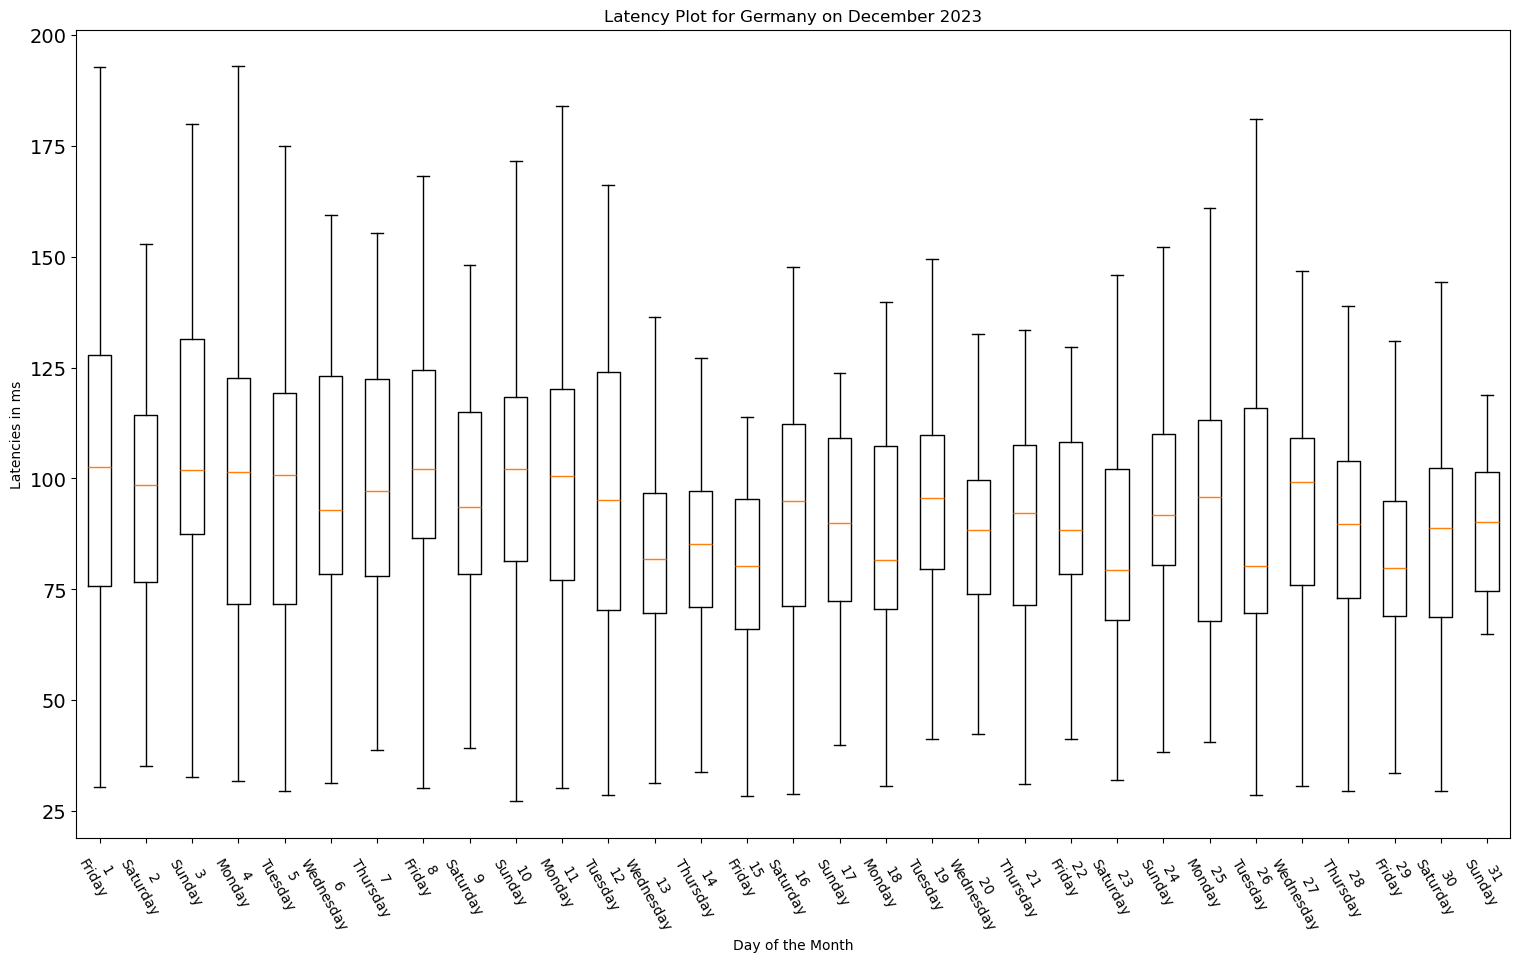

<Figure size 640x480 with 0 Axes>

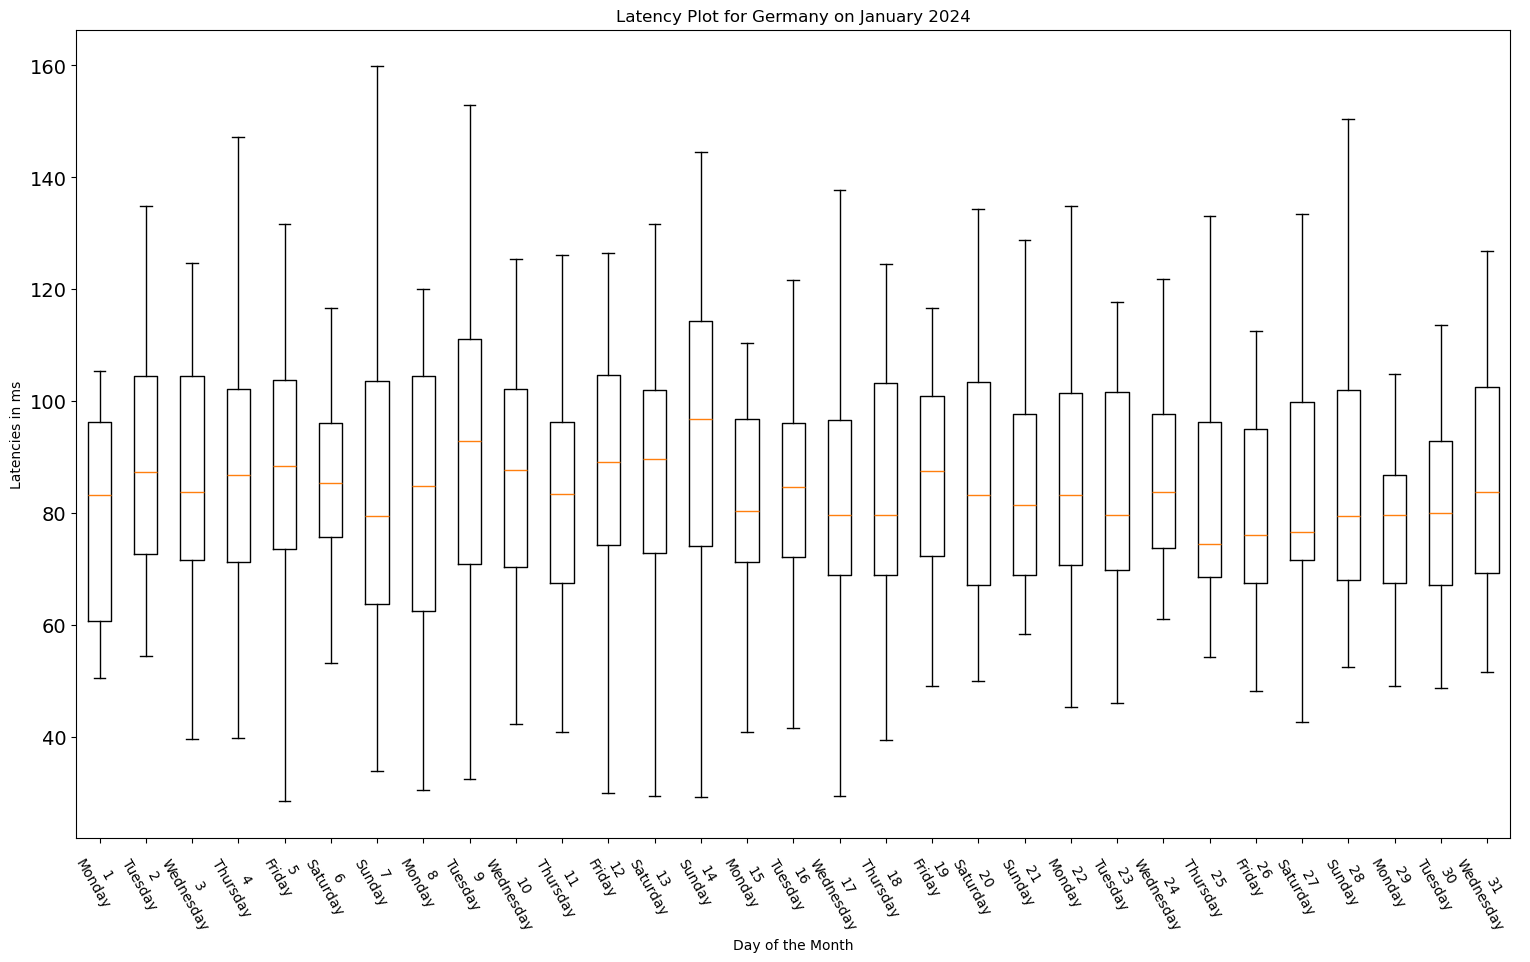

<Figure size 640x480 with 0 Axes>

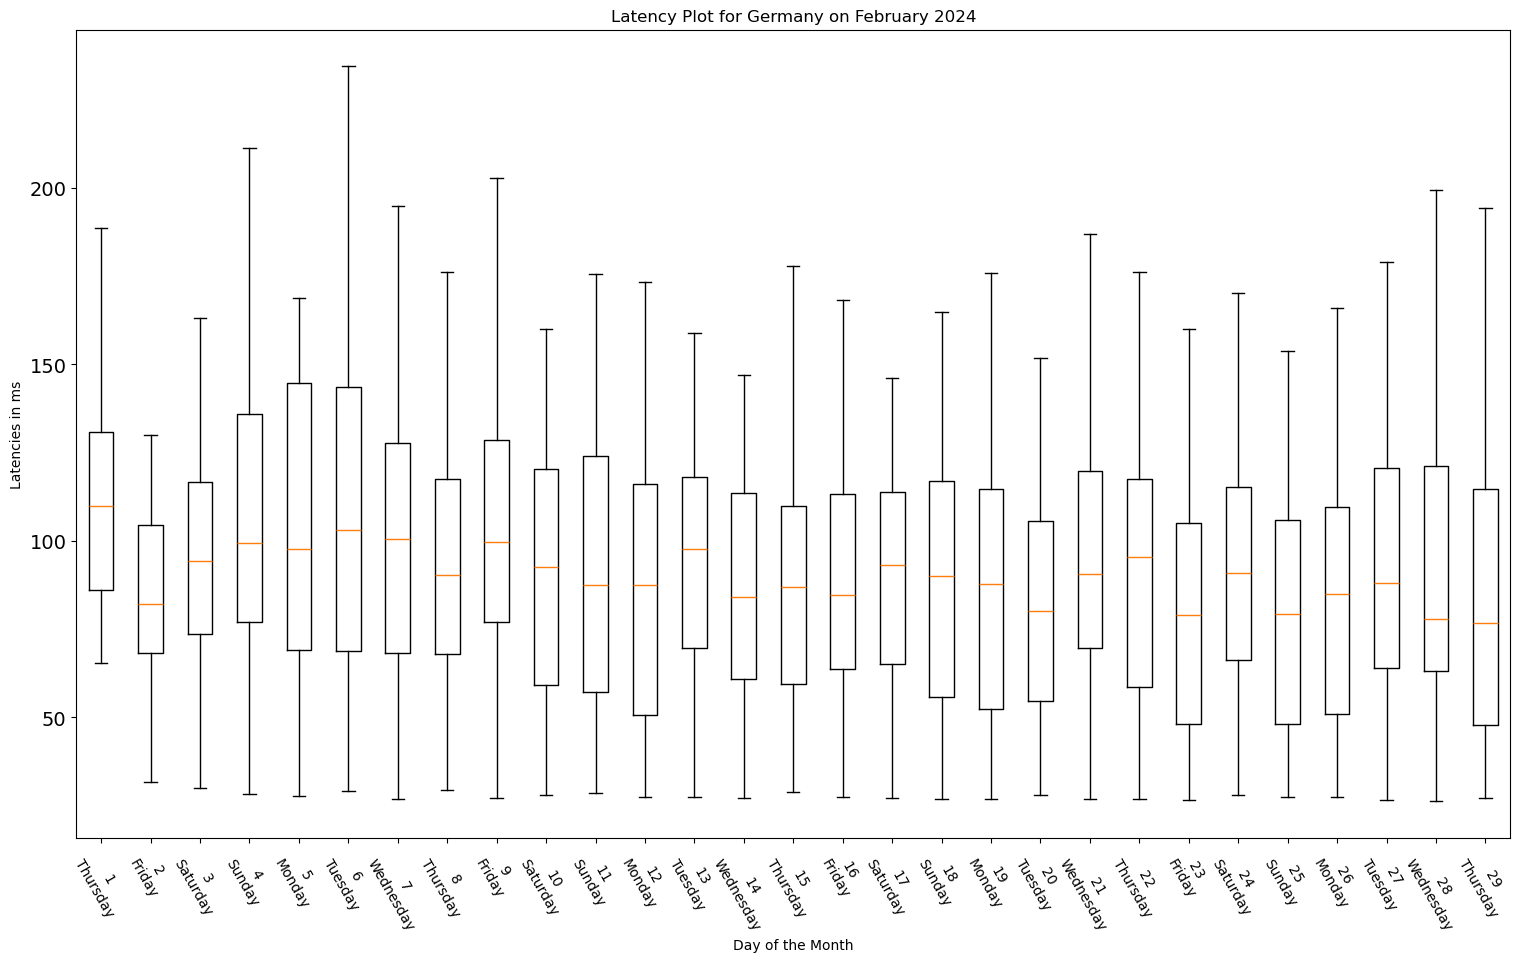

<Figure size 640x480 with 0 Axes>

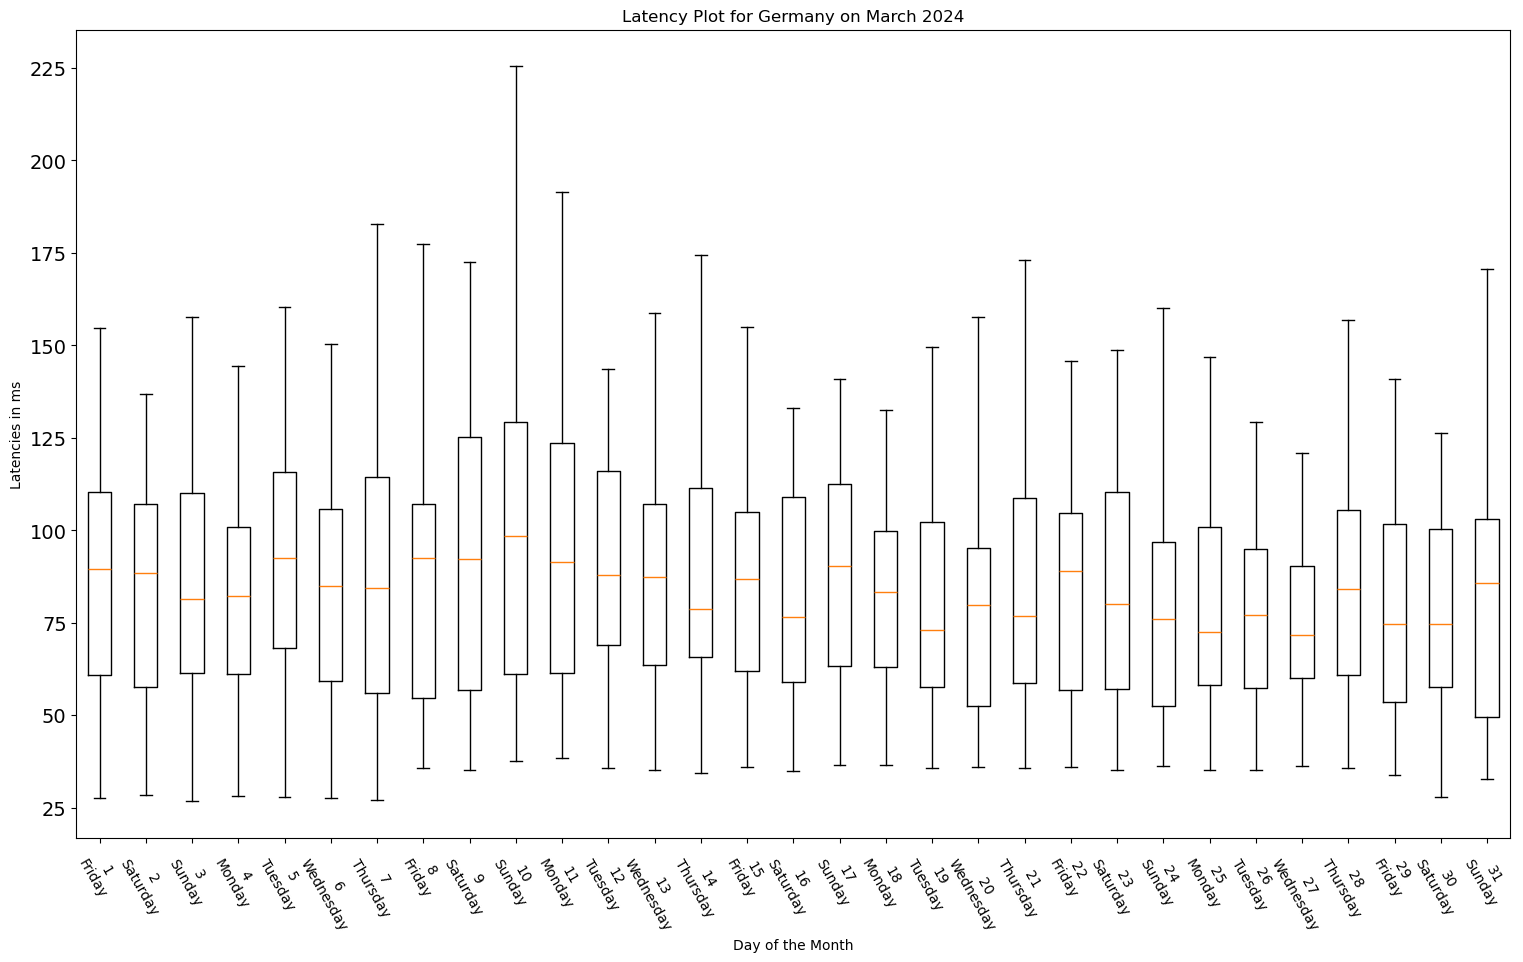

<Figure size 640x480 with 0 Axes>

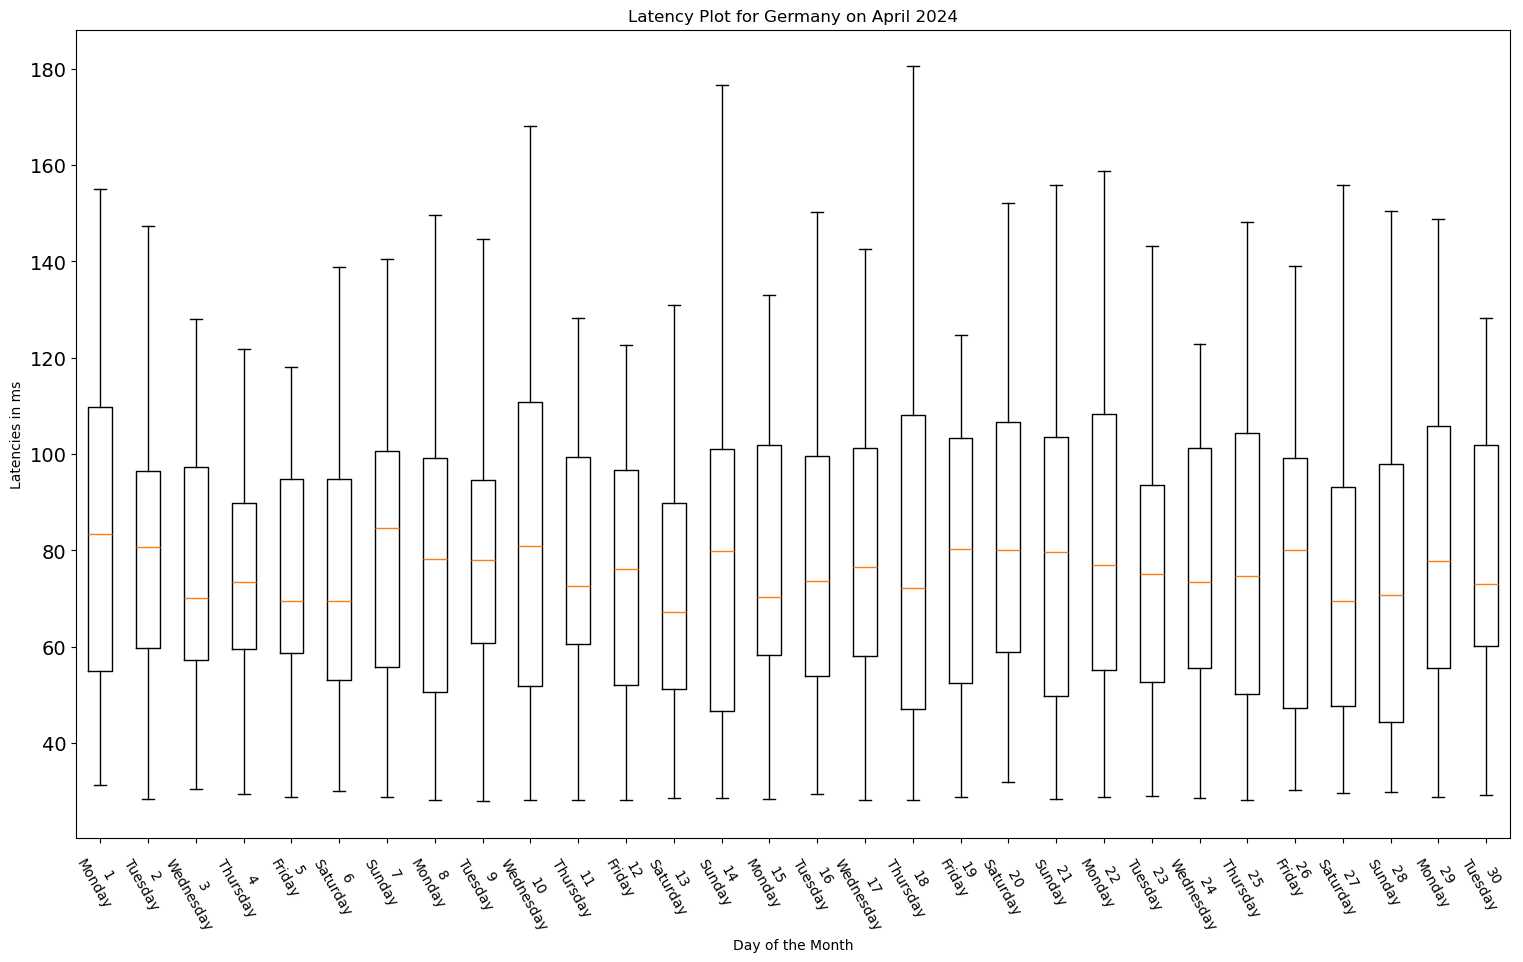

<Figure size 640x480 with 0 Axes>

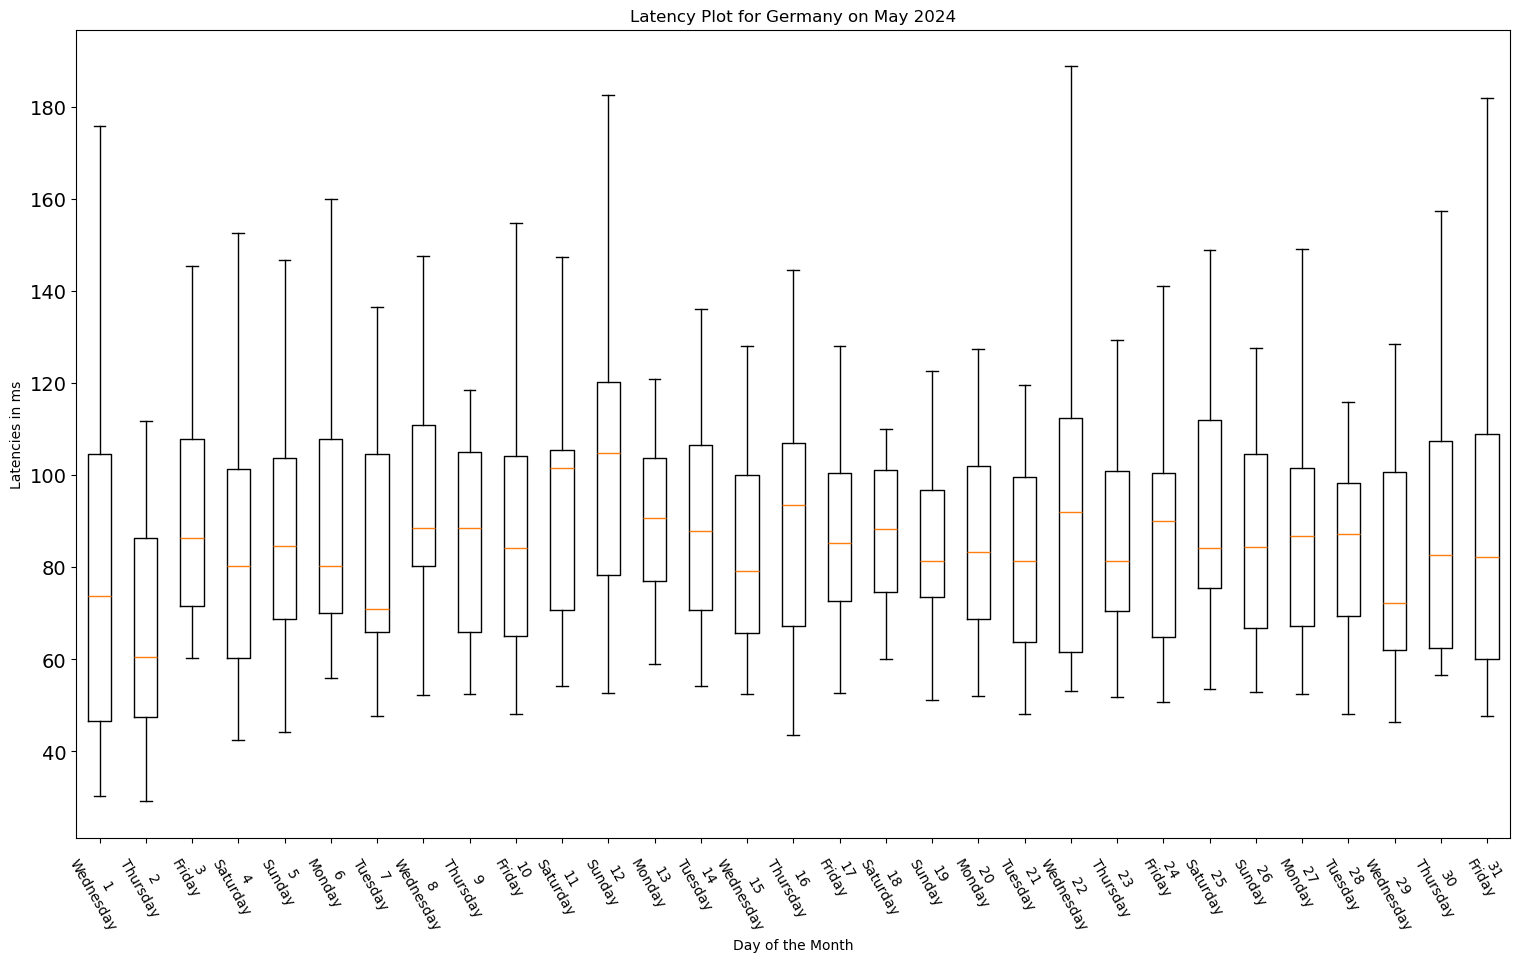

<Figure size 640x480 with 0 Axes>

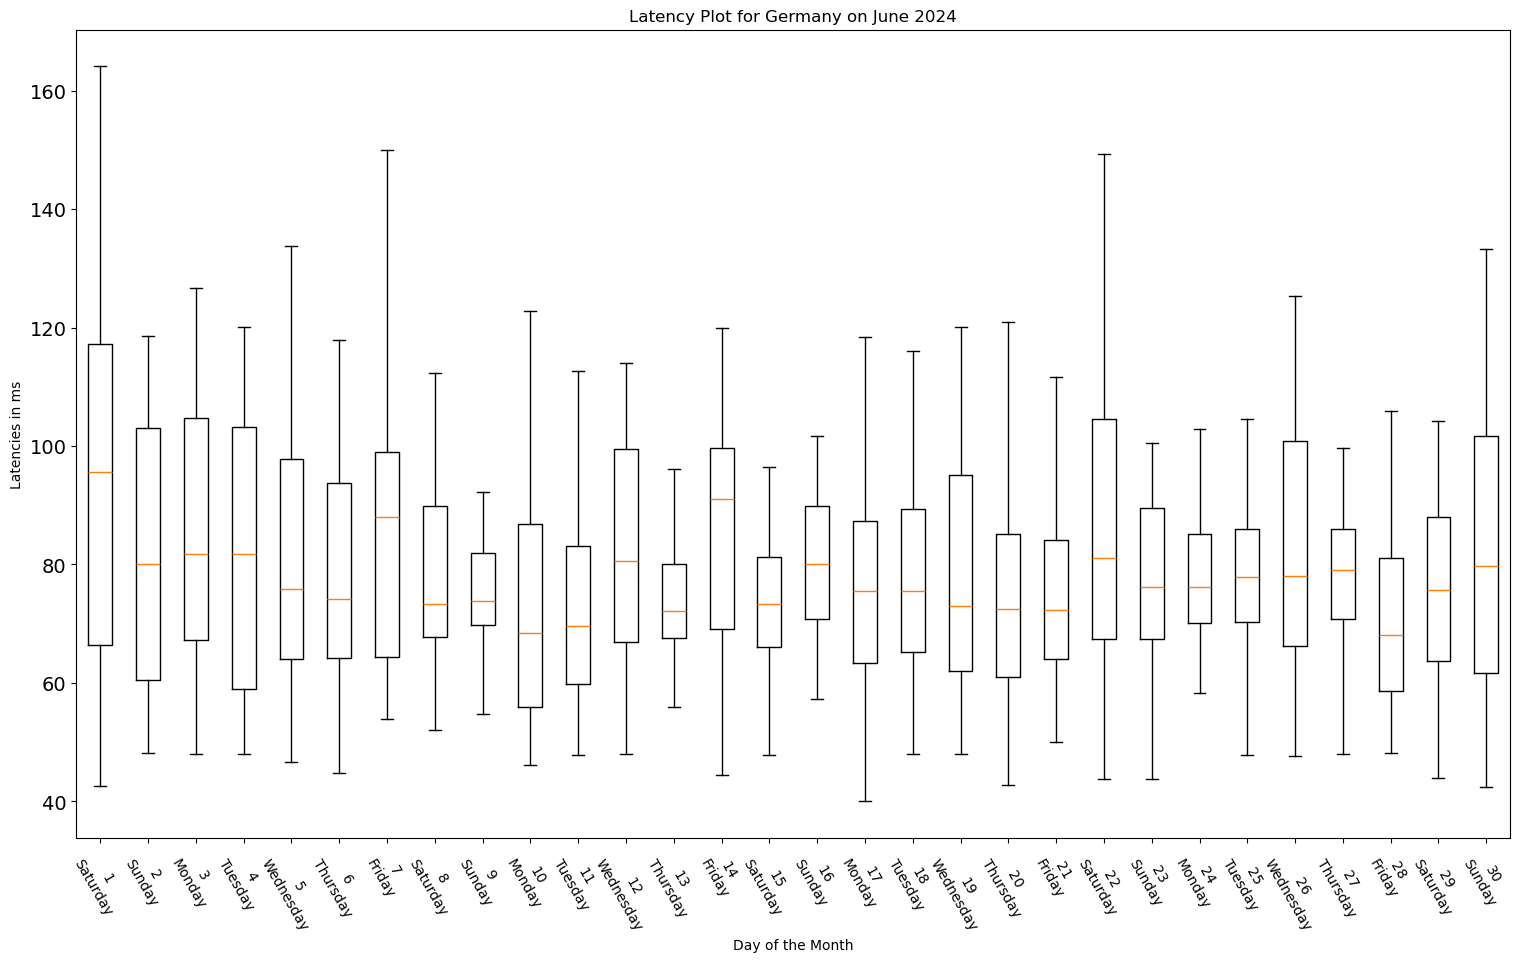

<Figure size 640x480 with 0 Axes>

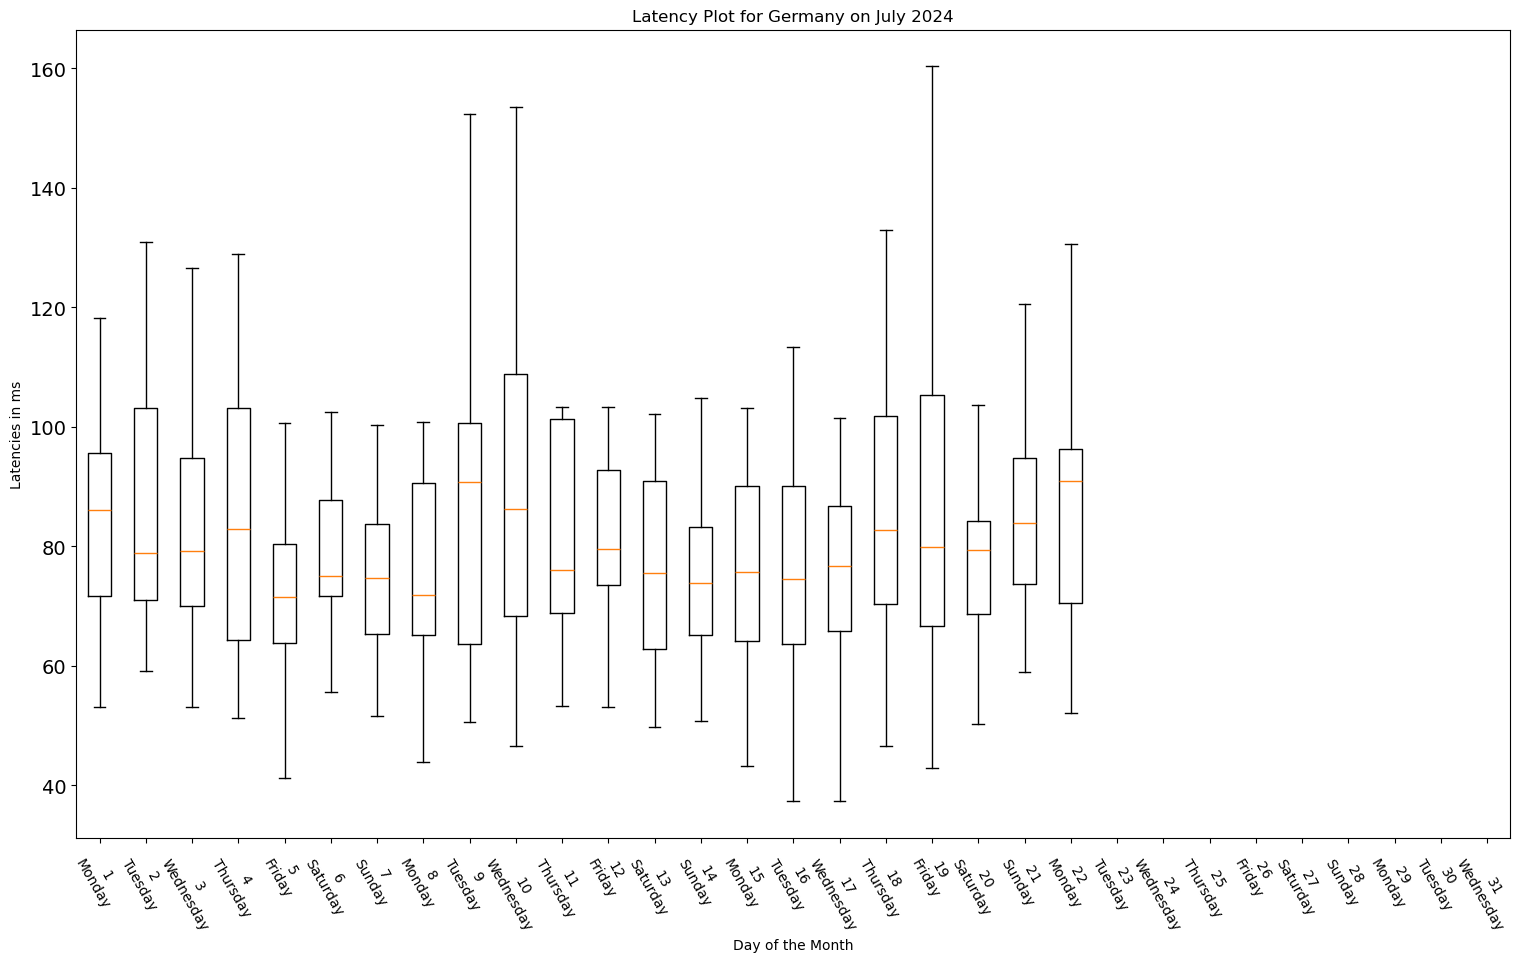

<Figure size 640x480 with 0 Axes>

In [97]:
weekday_analysis = {2022: {}, 2023: {}, 2024: {}}
for y in [2022, 2023, 2024]:
    for i in range(1, 8): weekday_analysis[y][i] = []

results_dir = './individual_months_results'
def plot(days, title, country, year, month):
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the boxplots
    ax.boxplot(days, showfliers=False)
    ax.tick_params(axis='y', which='major', labelsize=14)

    xticks_locations = np.arange(1, len(days) + 1)
    xticks_labels = [str(v) + "\n" + date_to_weekday(v, month, year) for v in xticks_locations]
    assert len(xticks_locations) == len(days)
    
    plt.xticks(xticks_locations, xticks_labels, rotation = -60)
    
    # Set axis labels and title
    ax.set_xlabel('Day of the Month')
    ax.set_ylabel('Latencies in ms')
    ax.set_title('Boxplot of Days per Month')
    plt.title(title)
    fig.set_size_inches(18.5, 10.5)
    plt.savefig(results_dir + "/" + country + '/' + title.lower().replace(" ", "_").replace('/','-') + ".pdf")
    plt.show()
    plt.clf()

one_day = timedelta(days=1)
def plot_all_months(tls_data, country):
    tmp_df = filter_for(tls_data, 'country', country)
    
    min = datetime.fromtimestamp(np.min(tmp_df['timestamp'].tolist()))
    max = datetime.fromtimestamp(np.max(tmp_df['timestamp'].tolist()))
    
    def nicify_month(d):
        return d.strftime("%B") + " " + str(d.year)
    
    current = datetime(min.year, min.month, min.day)
    while current < max:
        days_this_month = days_in_month(current.year, current.month)
        days = [ filter_for_range(tmp_df, 'timestamp', datetime.timestamp(current + (one_day * i)), datetime.timestamp(current + (one_day * (i+1))))['rt'] for i in range(0, days_this_month)]
        plot(days, "Latency Plot for " + country_name(country) +  " on " + nicify_month(current), country, current.year, current.month)

        first_day = first_weekday_of_month(current.year, current.month)
        for i in range(0, len(days)):
            current_weekday = (current + one_day * i).weekday()            
            weekday_analysis[current.year][current_weekday + 1].extend(days[i])
        
        current = current + (one_day * days_this_month)

if not os.path.isdir(results_dir): os.mkdir(results_dir)
for c in ['DE']: # countries:
    dir = os.path.join(results_dir, c)
    if not os.path.isdir(dir):
        os.mkdir(dir)
    plot_all_months(df, c)

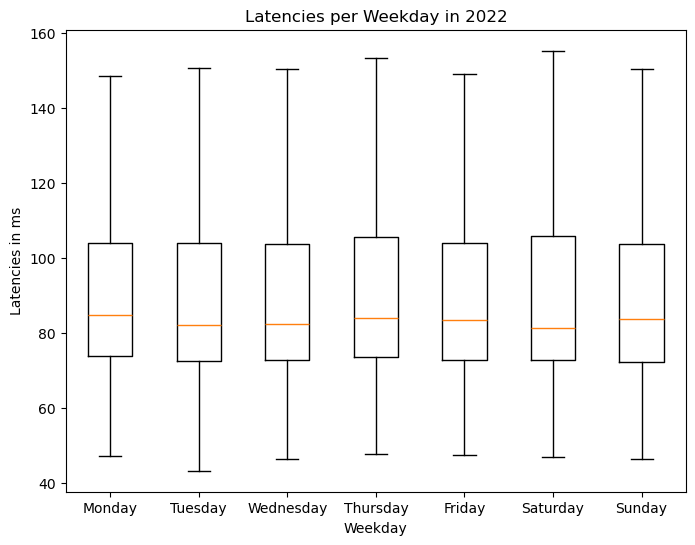

Weekday                 Monday Tuesday Wednesday Thursday  Friday Saturday  \
2022                                                                         
Number of Measurements     899     895       904      903     906      918   
Median                    85.0    82.0      82.0     84.0    83.0     81.0   
Average                  100.0   100.0     107.0     98.0   100.0     99.0   
Maximum                 1211.0  3091.0    3057.0    703.0  1230.0   1106.0   
Minimum                   47.0    43.0      46.0     48.0    48.0     47.0   

Weekday                Sunday  
2022                           
Number of Measurements    893  
Median                   84.0  
Average                  94.0  
Maximum                 673.0  
Minimum                  46.0  
\begin{table}
\caption{Weekday Statistics for 2022 in Germany}
\label{fig:weekday-statistics-2022}
\begin{tabular}{lllllll}
\toprule
Monday & Tuesday & Wednesday & Thursday & Friday & Saturday & Sunday \\
\midrule
 &  &  &  &  & 

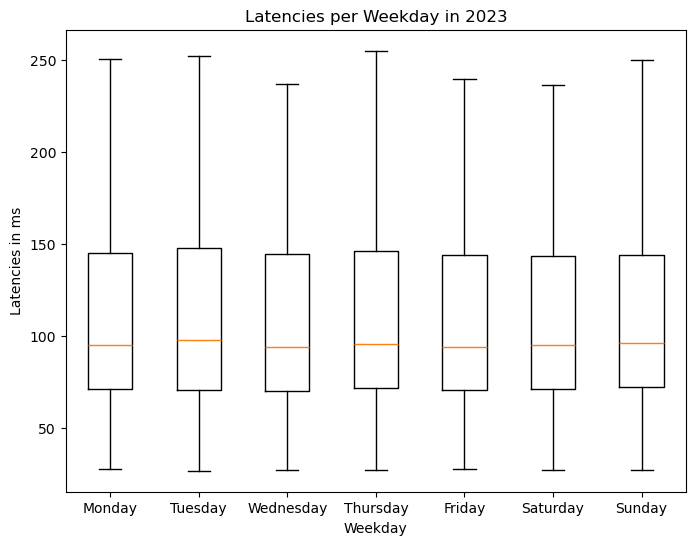

Weekday                 Monday Tuesday Wednesday Thursday  Friday Saturday  \
2023                                                                         
Number of Measurements    1448    1447      1443     1429    1430     1436   
Median                    95.0    98.0      94.0     96.0    94.0     95.0   
Average                  111.0   111.0     109.0    110.0   108.0    109.0   
Maximum                 1245.0  1227.0    1233.0    708.0  1089.0   1221.0   
Minimum                   28.0    27.0      27.0     27.0    28.0     27.0   

Weekday                 Sunday  
2023                            
Number of Measurements    1462  
Median                    96.0  
Average                  108.0  
Maximum                 1052.0  
Minimum                   27.0  
\begin{table}
\caption{Weekday Statistics for 2023 in Germany}
\label{fig:weekday-statistics-2023}
\begin{tabular}{lllllll}
\toprule
Monday & Tuesday & Wednesday & Thursday & Friday & Saturday & Sunday \\
\midrule
 &  &  &

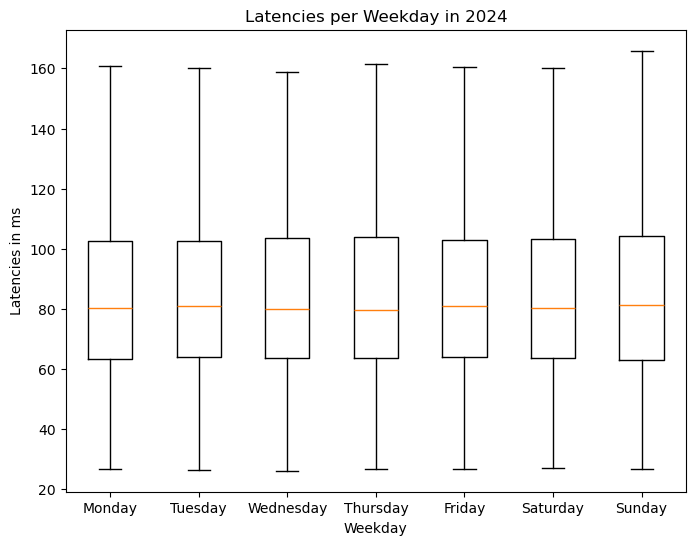

Weekday                 Monday Tuesday Wednesday Thursday  Friday Saturday  \
2024                                                                         
Number of Measurements     914     930       904      913     914      912   
Median                    80.0    81.0      80.0     80.0    81.0     80.0   
Average                   97.0    94.0     104.0    106.0    96.0     96.0   
Maximum                 3148.0  1592.0    4375.0   3625.0  4368.0   1230.0   
Minimum                   27.0    26.0      26.0     27.0    27.0     27.0   

Weekday                 Sunday  
2024                            
Number of Measurements     918  
Median                    81.0  
Average                   95.0  
Maximum                 1320.0  
Minimum                   27.0  
\begin{table}
\caption{Weekday Statistics for 2024 in Germany}
\label{fig:weekday-statistics-2024}
\begin{tabular}{lllllll}
\toprule
Monday & Tuesday & Wednesday & Thursday & Friday & Saturday & Sunday \\
\midrule
 &  &  &

In [111]:
for year in weekday_analysis:
    data_list = []
    for d in weekday_analysis[year]:
        data_list.append(weekday_analysis[year][d])

    data = {
        str(year): [''] * len(day_name),
        'Weekday': list(day_name),
        'Number of Measurements': [],
        'Median': [],
        'Average': [],
        'Maximum': [],
        'Minimum': []
    }
    
    for l in data_list:
        data['Number of Measurements'].append(len(l))
        data['Median'].append(np.round(np.median(l), 0))
        data['Average'].append(np.round(np.mean(l), 0))
        data['Maximum'].append(np.round(np.max(l), 0))
        data['Minimum'].append(np.round(np.min(l), 0))
    weekday_statistics = pd.DataFrame(data=data).set_index('Weekday').T
    
    def plot_weekdays(data):
        # Create a figure and axis
        fig, ax = plt.subplots()
        
        # Plot the boxplots
        ax.boxplot(data, showfliers=False)
        # ax.tick_params(axis='y', which='major', labelsize=14)
    
        xticks_locations = np.arange(1, 8)
        xticks_labels = day_name
        
        plt.xticks(xticks_locations, xticks_labels)
        
        # Set axis labels and title
        ax.set_xlabel('Weekday')
        ax.set_ylabel('Latencies in ms')
        plt.title('Latencies per Weekday in ' + str(year))
        fig.set_size_inches(8, 6)
        plt.show()
    
    plot_weekdays(data_list)
    print(weekday_statistics)
    print(to_latex(weekday_statistics, label="fig:weekday-statistics-"+str(year), caption="Weekday Statistics for " + str(year) + " in Germany").replace(".000000", ""))